<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Final-Project-Submission" data-toc-modified-id="Final-Project-Submission-0.1">Final Project Submission</a></span></li></ul></li><li><span><a href="#PROJECT-OVERVIEW" data-toc-modified-id="PROJECT-OVERVIEW-1">PROJECT OVERVIEW</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#The-objective-of-this-project-is-to-use-the-King-County-house-dataset-to-produce-a-multiple-linear-regression-model-to-predict-sale-prices.-The-motivation-behind-this-study-is-to-help-homeowners-identify-areas-in-which-they-can-maximize-profts-when-selling-their-homes." data-toc-modified-id="The-objective-of-this-project-is-to-use-the-King-County-house-dataset-to-produce-a-multiple-linear-regression-model-to-predict-sale-prices.-The-motivation-behind-this-study-is-to-help-homeowners-identify-areas-in-which-they-can-maximize-profts-when-selling-their-homes.-1.0.1">The objective of this project is to use the King County house dataset to produce a multiple linear regression model to predict sale prices. The motivation behind this study is to help homeowners identify areas in which they can maximize profts when selling their homes.</a></span></li><li><span><a href="#First,-I-import-the-relevant-python-libraries-and-dataset,-inspect-the-data,-and-remove-extraneous-information-from-the-dataset." data-toc-modified-id="First,-I-import-the-relevant-python-libraries-and-dataset,-inspect-the-data,-and-remove-extraneous-information-from-the-dataset.-1.0.2">First, I import the relevant python libraries and dataset, inspect the data, and remove extraneous information from the dataset.</a></span></li><li><span><a href="#Second,-I-scrub-the-data-to-address-null,-missing,-and-placeholder-values,-while-deciding-how-to-handle-categorical-variables-and-inspecting-variables-for-multicollinearity.-During-the-scrub-phase,-I-use-the-latitude-and-longitude-information-to-engineer-a-new-feature-representing-the-distance-each-home-from-downtown-Seattle." data-toc-modified-id="Second,-I-scrub-the-data-to-address-null,-missing,-and-placeholder-values,-while-deciding-how-to-handle-categorical-variables-and-inspecting-variables-for-multicollinearity.-During-the-scrub-phase,-I-use-the-latitude-and-longitude-information-to-engineer-a-new-feature-representing-the-distance-each-home-from-downtown-Seattle.-1.0.3">Second, I scrub the data to address null, missing, and placeholder values, while deciding how to handle categorical variables and inspecting variables for multicollinearity. During the scrub phase, I use the latitude and longitude information to engineer a new feature representing the distance each home from downtown Seattle.</a></span></li><li><span><a href="#Third,-I-explore-the-scrubbed-data-by-visualizing-distributions,-linearity-between-variables,-and-detection-of-outliers-using-an-IQR-score-method.-During-the-explore-phase,-I-also-perform-one-hot-encoding-for-several-variables,-logarithmically-transform-two-variables,-and-set-all-independent-numerical-variables-to-the-same-min-max-scale." data-toc-modified-id="Third,-I-explore-the-scrubbed-data-by-visualizing-distributions,-linearity-between-variables,-and-detection-of-outliers-using-an-IQR-score-method.-During-the-explore-phase,-I-also-perform-one-hot-encoding-for-several-variables,-logarithmically-transform-two-variables,-and-set-all-independent-numerical-variables-to-the-same-min-max-scale.-1.0.4">Third, I explore the scrubbed data by visualizing distributions, linearity between variables, and detection of outliers using an IQR score method. During the explore phase, I also perform one-hot encoding for several variables, logarithmically transform two variables, and set all independent numerical variables to the same min-max scale.</a></span></li><li><span><a href="#Fourth,-I-use-recursive-feature-elimination-(RFE)-to-determine-the-most-important-features-in-my-initial-model,-and-use-plots-of-r-squared-and-mean-squared-error-(MSE)-to-determine-the-ideal-number-of-features-to-select-for-linear-regression.-During-the-model-phase,-I-use-these-selected-features-in-the-statsmodels-OLS-function-to-create-an-initial-model." data-toc-modified-id="Fourth,-I-use-recursive-feature-elimination-(RFE)-to-determine-the-most-important-features-in-my-initial-model,-and-use-plots-of-r-squared-and-mean-squared-error-(MSE)-to-determine-the-ideal-number-of-features-to-select-for-linear-regression.-During-the-model-phase,-I-use-these-selected-features-in-the-statsmodels-OLS-function-to-create-an-initial-model.-1.0.5">Fourth, I use recursive feature elimination (RFE) to determine the most important features in my initial model, and use plots of r-squared and mean squared error (MSE) to determine the ideal number of features to select for linear regression. During the model phase, I use these selected features in the statsmodels OLS function to create an initial model.</a></span></li><li><span><a href="#Finally,-I-revise-the-initial-model-by-(1)-checking-for-missed-non-linearity-in-variables,-(2)-including-zip-codes-in-the-revised-linear-regression-model,-and-(3)-using-the-simple-linear-regression-of-each-variable-against-the-target-as-a-means-for-feature-selection-in-the-revised-linear-regression-model,-instead-of-RFE." data-toc-modified-id="Finally,-I-revise-the-initial-model-by-(1)-checking-for-missed-non-linearity-in-variables,-(2)-including-zip-codes-in-the-revised-linear-regression-model,-and-(3)-using-the-simple-linear-regression-of-each-variable-against-the-target-as-a-means-for-feature-selection-in-the-revised-linear-regression-model,-instead-of-RFE.-1.0.6">Finally, I revise the initial model by (1) checking for missed non-linearity in variables, (2) including zip codes in the revised linear regression model, and (3) using the simple linear regression of each variable against the target as a means for feature selection in the revised linear regression model, instead of RFE.</a></span></li></ul></li></ul></li><li><span><a href="#OBTAIN" data-toc-modified-id="OBTAIN-2">OBTAIN</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Import-relevant-libraries-and-data" data-toc-modified-id="Import-relevant-libraries-and-data-2.0.1">Import relevant libraries and data</a></span></li><li><span><a href="#Removing-the-'id'-and-'date'-columns,-as-they-will-not-be-relevant-to-the-regression" data-toc-modified-id="Removing-the-'id'-and-'date'-columns,-as-they-will-not-be-relevant-to-the-regression-2.0.2">Removing the 'id' and 'date' columns, as they will not be relevant to the regression</a></span></li></ul></li></ul></li><li><span><a href="#SCRUB" data-toc-modified-id="SCRUB-3">SCRUB</a></span><ul class="toc-item"><li><span><a href="#ADDRESS-NULL/MISSING-VALUES-AND-POTENTIAL-CATEGORICAL-VARIABLES" data-toc-modified-id="ADDRESS-NULL/MISSING-VALUES-AND-POTENTIAL-CATEGORICAL-VARIABLES-3.1">ADDRESS NULL/MISSING VALUES AND POTENTIAL CATEGORICAL VARIABLES</a></span><ul class="toc-item"><li><span><a href="#Get-an-overview-of-all-columns-using-check_column-function" data-toc-modified-id="Get-an-overview-of-all-columns-using-check_column-function-3.1.1">Get an overview of all columns using check_column function</a></span></li><li><span><a href="#CONCLUSIONS-ON-NULL/MISSING-VALUES:" data-toc-modified-id="CONCLUSIONS-ON-NULL/MISSING-VALUES:-3.1.2">CONCLUSIONS ON NULL/MISSING VALUES:</a></span><ul class="toc-item"><li><span><a href="#--'waterfront'---Lots-of-null-values.-STRATEGY:-Replace-null-values-with-most-common-value,-0.0" data-toc-modified-id="--'waterfront'---Lots-of-null-values.-STRATEGY:-Replace-null-values-with-most-common-value,-0.0-3.1.2.1">- 'waterfront' - Lots of null values. STRATEGY: Replace null values with most common value, 0.0</a></span></li><li><span><a href="#-'view'---Some-null-values.-STRATEGY:-Replace-null-values-with-most-common-value,-0.0" data-toc-modified-id="-'view'---Some-null-values.-STRATEGY:-Replace-null-values-with-most-common-value,-0.0-3.1.2.2">-'view' - Some null values. STRATEGY: Replace null values with most common value, 0.0</a></span></li><li><span><a href="#-'yr_renovated'---Lots-of-null-values,-column-entries-mostly-have-value-of-0.0.-STRATEGY:-Drop-entire-column-from-dataset" data-toc-modified-id="-'yr_renovated'---Lots-of-null-values,-column-entries-mostly-have-value-of-0.0.-STRATEGY:-Drop-entire-column-from-dataset-3.1.2.3">-'yr_renovated' - Lots of null values, column entries mostly have value of 0.0. STRATEGY: Drop entire column from dataset</a></span></li><li><span><a href="#-'sqft_basement'---Placeholder-variable-'?'.-STRATEGY:-Replace-'?'-with-most-common-value,-0.0" data-toc-modified-id="-'sqft_basement'---Placeholder-variable-'?'.-STRATEGY:-Replace-'?'-with-most-common-value,-0.0-3.1.2.4">-'sqft_basement' - Placeholder variable '?'. STRATEGY: Replace '?' with most common value, 0.0</a></span></li></ul></li><li><span><a href="#Replace-identified-null-values,-remove-'yr_renovated'-column,-change-'sqft_basement'-to-categorical" data-toc-modified-id="Replace-identified-null-values,-remove-'yr_renovated'-column,-change-'sqft_basement'-to-categorical-3.1.3">Replace identified null values, remove 'yr_renovated' column, change 'sqft_basement' to categorical</a></span></li><li><span><a href="#CONCLUSIONS-ON-CATEGORICAL-VARIABLES-&amp;-DATA-TYPES" data-toc-modified-id="CONCLUSIONS-ON-CATEGORICAL-VARIABLES-&amp;-DATA-TYPES-3.1.4">CONCLUSIONS ON CATEGORICAL VARIABLES &amp; DATA TYPES</a></span><ul class="toc-item"><li><span><a href="#--'sqft_basement'---I-want-to-re-cast-as-categorical.-STRATEGY:-Convert-to-a-categorical-variable-(0-=-no-basement,-1-=-has-basement)" data-toc-modified-id="--'sqft_basement'---I-want-to-re-cast-as-categorical.-STRATEGY:-Convert-to-a-categorical-variable-(0-=-no-basement,-1-=-has-basement)-3.1.4.1">- 'sqft_basement' - I want to re-cast as categorical. STRATEGY: Convert to a categorical variable (0 = no basement, 1 = has basement)</a></span></li><li><span><a href="#--'waterfront',-'view',-'condition',-should-be-categorical-variables.-STRATEGY:-Convert-these-to-categorical-variables" data-toc-modified-id="--'waterfront',-'view',-'condition',-should-be-categorical-variables.-STRATEGY:-Convert-these-to-categorical-variables-3.1.4.2">- 'waterfront', 'view', 'condition', should be categorical variables. STRATEGY: Convert these to categorical variables</a></span></li></ul></li></ul></li><li><span><a href="#FEATURE-ENGINEERING:-DISTANCE-FROM-DOWNTOWN-SEATTLE-(dist_dt)" data-toc-modified-id="FEATURE-ENGINEERING:-DISTANCE-FROM-DOWNTOWN-SEATTLE-(dist_dt)-3.2">FEATURE ENGINEERING: DISTANCE FROM DOWNTOWN SEATTLE (dist_dt)</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Using-lat_lon_dist_calc-function-to-calculate-distance-from-observation-to-downtown-Seattle" data-toc-modified-id="Using-lat_lon_dist_calc-function-to-calculate-distance-from-observation-to-downtown-Seattle-3.2.0.1">Using lat_lon_dist_calc function to calculate distance from observation to downtown Seattle</a></span></li><li><span><a href="#I-am-using-this-feature-to-replace-the-'lat',-'long',-and-'zipcode'-columns-as-I-believe-it-will-capture-information-from-all-three" data-toc-modified-id="I-am-using-this-feature-to-replace-the-'lat',-'long',-and-'zipcode'-columns-as-I-believe-it-will-capture-information-from-all-three-3.2.0.2">I am using this feature to replace the 'lat', 'long', and 'zipcode' columns as I believe it will capture information from all three</a></span></li><li><span><a href="#I-hypothesize-that-there-will-be-a-decreasing-relationship-with-price-as-dist_dt-increases" data-toc-modified-id="I-hypothesize-that-there-will-be-a-decreasing-relationship-with-price-as-dist_dt-increases-3.2.0.3">I hypothesize that there will be a decreasing relationship with price as dist_dt increases</a></span></li></ul></li><li><span><a href="#Question-#1:-Do-any-features-display-high-collinearity-(>0.75)-that-should-be-removed-before-modeling?" data-toc-modified-id="Question-#1:-Do-any-features-display-high-collinearity-(>0.75)-that-should-be-removed-before-modeling?-3.2.1">Question #1: Do any features display high collinearity (&gt;0.75) that should be removed before modeling?</a></span></li><li><span><a href="#ASSESS-MULTICOLLINEARITY-OF-FEATURES" data-toc-modified-id="ASSESS-MULTICOLLINEARITY-OF-FEATURES-3.2.2">ASSESS MULTICOLLINEARITY OF FEATURES</a></span></li><li><span><a href="#Question-#1-Answer:-Multicollinearity-observaions" data-toc-modified-id="Question-#1-Answer:-Multicollinearity-observaions-3.2.3">Question #1 Answer: Multicollinearity observaions</a></span><ul class="toc-item"><li><span><a href="#--sqft_living-is-highly-correlated-(R->-0.75)-to-sqft_above,-bathrooms,-grade,-sqft_living15" data-toc-modified-id="--sqft_living-is-highly-correlated-(R->-0.75)-to-sqft_above,-bathrooms,-grade,-sqft_living15-3.2.3.1">- sqft_living is highly correlated (R &gt; 0.75) to sqft_above, bathrooms, grade, sqft_living15</a></span></li><li><span><a href="#-Since-it-is-highly-correlated-to-many-other-variables,-it-makes-sense-to-remove-sqft_living-before-proceeding-with-regression" data-toc-modified-id="-Since-it-is-highly-correlated-to-many-other-variables,-it-makes-sense-to-remove-sqft_living-before-proceeding-with-regression-3.2.3.2">-Since it is highly correlated to many other variables, it makes sense to remove sqft_living before proceeding with regression</a></span></li></ul></li><li><span><a href="#Removal-of-collinear-features-for-scrubbed-df" data-toc-modified-id="Removal-of-collinear-features-for-scrubbed-df-3.2.4">Removal of collinear features for scrubbed df</a></span></li><li><span><a href="#SUMMARY-OF-INITIAL-DATA-SCRUB:" data-toc-modified-id="SUMMARY-OF-INITIAL-DATA-SCRUB:-3.2.5">SUMMARY OF INITIAL DATA SCRUB:</a></span><ul class="toc-item"><li><span><a href="#--Variables-dropped-from-dataset:" data-toc-modified-id="--Variables-dropped-from-dataset:-3.2.5.1">- Variables dropped from dataset:</a></span></li><li><span><a href="#--Variables-left-as-continuous-numerical:" data-toc-modified-id="--Variables-left-as-continuous-numerical:-3.2.5.2">- Variables left as continuous numerical:</a></span></li><li><span><a href="#--Variables-added-through-feature-engineering-as-continuous-numerical:" data-toc-modified-id="--Variables-added-through-feature-engineering-as-continuous-numerical:-3.2.5.3">- Variables added through feature engineering as continuous numerical:</a></span></li><li><span><a href="#--Variables-to-be-treated-as-categorical-using-cat.codes:" data-toc-modified-id="--Variables-to-be-treated-as-categorical-using-cat.codes:-3.2.5.4">- Variables to be treated as categorical using cat.codes:</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#EXPLORE" data-toc-modified-id="EXPLORE-4">EXPLORE</a></span><ul class="toc-item"><li><span><a href="#VISUALIZING-DISTRIBUTIONS-AND-SCATTER-PLOTS" data-toc-modified-id="VISUALIZING-DISTRIBUTIONS-AND-SCATTER-PLOTS-4.1">VISUALIZING DISTRIBUTIONS AND SCATTER PLOTS</a></span><ul class="toc-item"><li><span><a href="#Question-#2:-Can-variable-distributions-be-improved-by-objective-outlier-detection-and-removal?" data-toc-modified-id="Question-#2:-Can-variable-distributions-be-improved-by-objective-outlier-detection-and-removal?-4.1.1">Question #2: Can variable distributions be improved by objective outlier detection and removal?</a></span></li></ul></li><li><span><a href="#OUTLIER-DETECTION-AND-REMOVAL" data-toc-modified-id="OUTLIER-DETECTION-AND-REMOVAL-4.2">OUTLIER DETECTION AND REMOVAL</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Outlier-detection-performed-using-IQR-Scores" data-toc-modified-id="Outlier-detection-performed-using-IQR-Scores-4.2.0.1">Outlier detection performed using IQR Scores</a></span></li><li><span><a href="#All-outliers-identified-using-IQR-+/--1.5-for-non-categorical-variables-have-now-been-removed,-and-stored-in-new-df-(df_out_rem)." data-toc-modified-id="All-outliers-identified-using-IQR-+/--1.5-for-non-categorical-variables-have-now-been-removed,-and-stored-in-new-df-(df_out_rem).-4.2.0.2">All outliers identified using IQR +/- 1.5 for non-categorical variables have now been removed, and stored in new df (df_out_rem).</a></span></li></ul></li><li><span><a href="#Question-#2-Answer:-Yes,-'price',-'bedrooms',-'bathrooms',-'sqft_lot',-'sqft_above',-'sqft_living15',-'sqft_lot15',-and-'dist_dt'-are-much-more-normally-distributed-after-outlier-detection-and-removal." data-toc-modified-id="Question-#2-Answer:-Yes,-'price',-'bedrooms',-'bathrooms',-'sqft_lot',-'sqft_above',-'sqft_living15',-'sqft_lot15',-and-'dist_dt'-are-much-more-normally-distributed-after-outlier-detection-and-removal.-4.2.1">Question #2 Answer: Yes, 'price', 'bedrooms', 'bathrooms', 'sqft_lot', 'sqft_above', 'sqft_living15', 'sqft_lot15', and 'dist_dt' are much more normally distributed after outlier detection and removal.</a></span></li><li><span><a href="#Question-#3:-After-outlier-removal,-would-any-features-benefit-from-log-transformation?" data-toc-modified-id="Question-#3:-After-outlier-removal,-would-any-features-benefit-from-log-transformation?-4.2.2">Question #3: After outlier removal, would any features benefit from log transformation?</a></span></li><li><span><a href="#Question-#3-Answer:-Yes,-both-'sqft_above'-and-'sqft_living15'-both-have-more-normal-distributions-after-log-transformation." data-toc-modified-id="Question-#3-Answer:-Yes,-both-'sqft_above'-and-'sqft_living15'-both-have-more-normal-distributions-after-log-transformation.-4.2.3">Question #3 Answer: Yes, both 'sqft_above' and 'sqft_living15' both have more normal distributions after log transformation.</a></span></li></ul></li><li><span><a href="#ONE-HOT-ENCODING-OF-CATEGORICAL-VARIABLES" data-toc-modified-id="ONE-HOT-ENCODING-OF-CATEGORICAL-VARIABLES-4.3">ONE-HOT ENCODING OF CATEGORICAL VARIABLES</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Need-to-do-this-for-all-categoricals-before-performing-regression" data-toc-modified-id="Need-to-do-this-for-all-categoricals-before-performing-regression-4.3.0.1">Need to do this for all categoricals before performing regression</a></span></li><li><span><a href="#--'basement_coded'-and-'wf_coded'-are-already-in-the-correct-format" data-toc-modified-id="--'basement_coded'-and-'wf_coded'-are-already-in-the-correct-format-4.3.0.2">- 'basement_coded' and 'wf_coded' are already in the correct format</a></span></li><li><span><a href="#--Use-pandas-to-get-dummy-variables-for-'view_coded'-and-'cond_coded'" data-toc-modified-id="--Use-pandas-to-get-dummy-variables-for-'view_coded'-and-'cond_coded'-4.3.0.3">- Use pandas to get dummy variables for 'view_coded' and 'cond_coded'</a></span></li></ul></li></ul></li><li><span><a href="#MIN/MAX-SCALING-OF-FEATURES" data-toc-modified-id="MIN/MAX-SCALING-OF-FEATURES-4.4">MIN/MAX SCALING OF FEATURES</a></span></li></ul></li><li><span><a href="#MODEL" data-toc-modified-id="MODEL-5">MODEL</a></span><ul class="toc-item"><li><span><a href="#RECURSIVE-FEATURE-ELIMINATION-(RFE)---INITIAL-MODEL" data-toc-modified-id="RECURSIVE-FEATURE-ELIMINATION-(RFE)---INITIAL-MODEL-5.1">RECURSIVE FEATURE ELIMINATION (RFE) - INITIAL MODEL</a></span><ul class="toc-item"><li><span><a href="#Now-I-want-to-compare-r^2-to-MSE-as-I-increase-#-of-features,-to-find-point-of-diminishing-returns" data-toc-modified-id="Now-I-want-to-compare-r^2-to-MSE-as-I-increase-#-of-features,-to-find-point-of-diminishing-returns-5.1.1">Now I want to compare r^2 to MSE as I increase # of features, to find point of diminishing returns</a></span></li><li><span><a href="#The-above-R-squared-and-MSE-'elbow'-plots-indicate-that-I-can-safely-select-5-as-the-number-of-features.-Below-I-am-using-the-most-important-5-features-for-linear-regression-using-statsmodels,-as-indicated-by-RFE." data-toc-modified-id="The-above-R-squared-and-MSE-'elbow'-plots-indicate-that-I-can-safely-select-5-as-the-number-of-features.-Below-I-am-using-the-most-important-5-features-for-linear-regression-using-statsmodels,-as-indicated-by-RFE.-5.1.2">The above R-squared and MSE 'elbow' plots indicate that I can safely select 5 as the number of features. Below I am using the most important 5 features for linear regression using statsmodels, as indicated by RFE.</a></span></li><li><span><a href="#Initial-model-uses-the-following-five-features:-'sqft_living15_log',-'dist_dt',-'sqft_above_log',-'view_4',-and-'grade'" data-toc-modified-id="Initial-model-uses-the-following-five-features:-'sqft_living15_log',-'dist_dt',-'sqft_above_log',-'view_4',-and-'grade'-5.1.3">Initial model uses the following five features: 'sqft_living15_log', 'dist_dt', 'sqft_above_log', 'view_4', and 'grade'</a></span><ul class="toc-item"><li><span><a href="#-R-squared-=-0.59-(R-squared-and-adj-R-squared-are-identical)" data-toc-modified-id="-R-squared-=-0.59-(R-squared-and-adj-R-squared-are-identical)-5.1.3.1">-R-squared = 0.59 (R-squared and adj-R-squared are identical)</a></span></li><li><span><a href="#-p-value-=-0.00" data-toc-modified-id="-p-value-=-0.00-5.1.3.2">-p-value = 0.00</a></span></li><li><span><a href="#-Skewness-and-kurtosis-values-indicate-that-the-distribution-of-residuals-is-likely-normal-and-homoscedastic" data-toc-modified-id="-Skewness-and-kurtosis-values-indicate-that-the-distribution-of-residuals-is-likely-normal-and-homoscedastic-5.1.3.3">-Skewness and kurtosis values indicate that the distribution of residuals is likely normal and homoscedastic</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#iNTERPRET" data-toc-modified-id="iNTERPRET-6">iNTERPRET</a></span><ul class="toc-item"><li><span><a href="#CHECK-MODEL-AGAINST-LINEAR-REGRESSION-ASSUMPTIONS" data-toc-modified-id="CHECK-MODEL-AGAINST-LINEAR-REGRESSION-ASSUMPTIONS-6.1">CHECK MODEL AGAINST LINEAR REGRESSION ASSUMPTIONS</a></span><ul class="toc-item"><li><span><a href="#1)-Assess-normality-of-Residuals-using-Histograms-and-Q-Q-Plots" data-toc-modified-id="1)-Assess-normality-of-Residuals-using-Histograms-and-Q-Q-Plots-6.1.1">1) Assess normality of Residuals using Histograms and Q-Q Plots</a></span></li><li><span><a href="#2)-Assess-Heteroscedasticity-of-Residuals" data-toc-modified-id="2)-Assess-Heteroscedasticity-of-Residuals-6.1.2">2) Assess Heteroscedasticity of Residuals</a></span></li><li><span><a href="#CONCLUSION:-It-appears-the-assumptions-of-linear-regression-are-not-violated.-The-Q-Q-plot-and-histogram-of-residuals-indicate-some-right-skew,-but-this-does-not-seem-alarming.-The-model-residuals-appear-to-be-homoscedastic." data-toc-modified-id="CONCLUSION:-It-appears-the-assumptions-of-linear-regression-are-not-violated.-The-Q-Q-plot-and-histogram-of-residuals-indicate-some-right-skew,-but-this-does-not-seem-alarming.-The-model-residuals-appear-to-be-homoscedastic.-6.1.3">CONCLUSION: It appears the assumptions of linear regression are not violated. The Q-Q plot and histogram of residuals indicate some right-skew, but this does not seem alarming. The model residuals appear to be homoscedastic.</a></span></li></ul></li><li><span><a href="#MODEL-VALIDATION" data-toc-modified-id="MODEL-VALIDATION-6.2">MODEL VALIDATION</a></span><ul class="toc-item"><li><span><a href="#Train-Test-Split-Validation" data-toc-modified-id="Train-Test-Split-Validation-6.2.1">Train-Test-Split Validation</a></span><ul class="toc-item"><li><span><a href="#The-Train-and-Test-RMSE's-are-nearly-identical.-This-tells-us-that-our-model-is-not-being-undertrained-or-overtained-on-the-train-test-split---there-is-a-good-balance-here." data-toc-modified-id="The-Train-and-Test-RMSE's-are-nearly-identical.-This-tells-us-that-our-model-is-not-being-undertrained-or-overtained-on-the-train-test-split---there-is-a-good-balance-here.-6.2.1.1">The Train and Test RMSE's are nearly identical. This tells us that our model is not being undertrained or overtained on the train-test-split - there is a good balance here.</a></span></li><li><span><a href="#The-train-test-split-tells-us-that-the-standard-deviation-of-model-residuals-is-about-$122-123k." data-toc-modified-id="The-train-test-split-tells-us-that-the-standard-deviation-of-model-residuals-is-about-$122-123k.-6.2.1.2">The train-test-split tells us that the standard deviation of model residuals is about $122-123k.</a></span></li></ul></li><li><span><a href="#K-fold-Cross-Validation" data-toc-modified-id="K-fold-Cross-Validation-6.2.2">K-fold Cross Validation</a></span><ul class="toc-item"><li><span><a href="#The-k-fold-RMSE-for-10-bins-is-~-$123k,-virtually-identical-to-the-RMSE-from-train-test-split." data-toc-modified-id="The-k-fold-RMSE-for-10-bins-is-~-$123k,-virtually-identical-to-the-RMSE-from-train-test-split.-6.2.2.1">The k-fold RMSE for 10 bins is ~ $123k, virtually identical to the RMSE from train-test-split.</a></span></li></ul></li></ul></li><li><span><a href="#INITIAL-MODEL-SUMMARY" data-toc-modified-id="INITIAL-MODEL-SUMMARY-6.3">INITIAL MODEL SUMMARY</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Five-features-selected-('sqft_living15_log',-'dist_dt',-'sqft_above_log',-'view_4',-'grade')-using-sklearn-RFE" data-toc-modified-id="Five-features-selected-('sqft_living15_log',-'dist_dt',-'sqft_above_log',-'view_4',-'grade')-using-sklearn-RFE-6.3.0.1">Five features selected ('sqft_living15_log', 'dist_dt', 'sqft_above_log', 'view_4', 'grade') using sklearn RFE</a></span></li><li><span><a href="#Linear-regression-model-produced-using-these-five-features-in-statsmodels-OLS" data-toc-modified-id="Linear-regression-model-produced-using-these-five-features-in-statsmodels-OLS-6.3.0.2">Linear regression model produced using these five features in statsmodels OLS</a></span></li><li><span><a href="#R-squared-=-0.59" data-toc-modified-id="R-squared-=-0.59-6.3.0.3">R-squared = 0.59</a></span></li><li><span><a href="#Residuals-are-primarily-normally-distributed,-homoscedastic" data-toc-modified-id="Residuals-are-primarily-normally-distributed,-homoscedastic-6.3.0.4">Residuals are primarily normally distributed, homoscedastic</a></span></li><li><span><a href="#RMSE-of-train-test-split-and-k-fold-cross-validation-is-~-$123k" data-toc-modified-id="RMSE-of-train-test-split-and-k-fold-cross-validation-is-~-$123k-6.3.0.5">RMSE of train-test-split and k-fold cross validation is ~ $123k</a></span></li></ul></li></ul></li><li><span><a href="#REVISED-MODEL" data-toc-modified-id="REVISED-MODEL-6.4">REVISED MODEL</a></span><ul class="toc-item"><li><span><a href="#Goal:-See-if-I-can-improve-the-model-r-squared-value-while-reducing-errors,-and-maintaining-predictability-of-the-initial-model." data-toc-modified-id="Goal:-See-if-I-can-improve-the-model-r-squared-value-while-reducing-errors,-and-maintaining-predictability-of-the-initial-model.-6.4.1">Goal: See if I can improve the model r-squared value while reducing errors, and maintaining predictability of the initial model.</a></span></li><li><span><a href="#Strategy:" data-toc-modified-id="Strategy:-6.4.2">Strategy:</a></span></li><li><span><a href="#1)-Check-for-any-missed-non-linearity-between-the-variables-that-could-possibly-be-corrected" data-toc-modified-id="1)-Check-for-any-missed-non-linearity-between-the-variables-that-could-possibly-be-corrected-6.4.3">1) Check for any missed non-linearity between the variables that could possibly be corrected</a></span></li><li><span><a href="#2)-Include-zip-codes-as-a-categorical-variable-in-the-list-of-features-(previously-excluded)" data-toc-modified-id="2)-Include-zip-codes-as-a-categorical-variable-in-the-list-of-features-(previously-excluded)-6.4.4">2) Include zip codes as a categorical variable in the list of features (previously excluded)</a></span></li><li><span><a href="#3)-Instead-of-RFE,-check-simple-linear-regression-for-each-predictor-on-its-own-to-choose-top-5-features" data-toc-modified-id="3)-Instead-of-RFE,-check-simple-linear-regression-for-each-predictor-on-its-own-to-choose-top-5-features-6.4.5">3) Instead of RFE, check simple linear regression for each predictor on its own to choose top 5 features</a></span></li><li><span><a href="#I-don't-see-an-obvious-transformation-to-improve-the-linearity-of-any-features,-so-I-will-move-on-to-step-2." data-toc-modified-id="I-don't-see-an-obvious-transformation-to-improve-the-linearity-of-any-features,-so-I-will-move-on-to-step-2.-6.4.6">I don't see an obvious transformation to improve the linearity of any features, so I will move on to step 2.</a></span></li><li><span><a href="#Revised-model-uses-the-following-five-features:-'zip_coded',-'grade',-'sqft_living_15_log',-'dist_dt',-and-'sqft_above_log'" data-toc-modified-id="Revised-model-uses-the-following-five-features:-'zip_coded',-'grade',-'sqft_living_15_log',-'dist_dt',-and-'sqft_above_log'-6.4.7">Revised model uses the following five features: 'zip_coded', 'grade', 'sqft_living_15_log', 'dist_dt', and 'sqft_above_log'</a></span><ul class="toc-item"><li><span><a href="#-R-squared-=-0.77-(R-squared-and-adj-R-squared-are-almost-identical)" data-toc-modified-id="-R-squared-=-0.77-(R-squared-and-adj-R-squared-are-almost-identical)-6.4.7.1">-R-squared = 0.77 (R-squared and adj-R-squared are almost identical)</a></span></li><li><span><a href="#-p-value-=-0.00" data-toc-modified-id="-p-value-=-0.00-6.4.7.2">-p-value = 0.00</a></span></li><li><span><a href="#-Some-more-skewness-and-kurtosis-than-in-the-initial-model;-I-will-explore-this-below" data-toc-modified-id="-Some-more-skewness-and-kurtosis-than-in-the-initial-model;-I-will-explore-this-below-6.4.7.3">-Some more skewness and kurtosis than in the initial model; I will explore this below</a></span></li></ul></li></ul></li><li><span><a href="#1)-Assess-normality-of-Residuals-using-Histograms-and-Q-Q-Plots" data-toc-modified-id="1)-Assess-normality-of-Residuals-using-Histograms-and-Q-Q-Plots-6.5">1) Assess normality of Residuals using Histograms and Q-Q Plots</a></span><ul class="toc-item"><li><span><a href="#CONCLUSION:-The-histogram-indicates-some-right-skew,-but-this-does-not-seem-alarming.-The-model-residuals-appear-to-be-homoscedastic,-and-the-Q-Q-plot-indicates-that-the-distribution-is-not-quite-normal." data-toc-modified-id="CONCLUSION:-The-histogram-indicates-some-right-skew,-but-this-does-not-seem-alarming.-The-model-residuals-appear-to-be-homoscedastic,-and-the-Q-Q-plot-indicates-that-the-distribution-is-not-quite-normal.-6.5.1">CONCLUSION: The histogram indicates some right-skew, but this does not seem alarming. The model residuals appear to be homoscedastic, and the Q-Q plot indicates that the distribution is not quite normal.</a></span></li><li><span><a href="#REVISED-MODEL-Train-Test-Split-Validation" data-toc-modified-id="REVISED-MODEL-Train-Test-Split-Validation-6.5.2">REVISED MODEL Train-Test-Split Validation</a></span><ul class="toc-item"><li><span><a href="#The-revised-model-Train-and-Test-RMSE's-are-nearly-identical.-This-tells-us-that-our-revised-model-is-not-being-undertrained-or-overtained-on-the-train-test-split---there-is-a-good-balance-here." data-toc-modified-id="The-revised-model-Train-and-Test-RMSE's-are-nearly-identical.-This-tells-us-that-our-revised-model-is-not-being-undertrained-or-overtained-on-the-train-test-split---there-is-a-good-balance-here.-6.5.2.1">The revised model Train and Test RMSE's are nearly identical. This tells us that our revised model is not being undertrained or overtained on the train-test-split - there is a good balance here.</a></span></li><li><span><a href="#The-train-test-split-tells-us-that-the-standard-deviation-of-revised-model-residuals-is-$92-93k." data-toc-modified-id="The-train-test-split-tells-us-that-the-standard-deviation-of-revised-model-residuals-is-$92-93k.-6.5.2.2">The train-test-split tells us that the standard deviation of revised model residuals is $92-93k.</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#CONCLUSIONS-&amp;-RECOMMENDATIONS" data-toc-modified-id="CONCLUSIONS-&amp;-RECOMMENDATIONS-7">CONCLUSIONS &amp; RECOMMENDATIONS</a></span><ul class="toc-item"><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-7.1">Conclusion</a></span><ul class="toc-item"><li><span><a href="#The-most-important-predictors-of-sales-price-in-King-County-are:-zip-code-('zip_coded'),-construction/design-grade-('grade'),-size-of-neighborhood-interior-living-space-('sqft_living15_log'),-distance-from-downtown-Seattle-('dist_dt'),-and-size-of-house-above-ground-level-('sqft_above_log).-Grade,-size-of-neighborhood-interior-living-space-(log-transformed),-and-size-of-house-above-ground-(log-transformed)-have-a-positive-relationship-with-price.-Distance-from-downtown-Seattle-has-a-negative-relationship-with-price.-Zip-code-is-more-complex-in-interpretation---however,-the-zip-code-in-which-a-home-is-located-is-generally-a-good-predictor-of-price.-These-five-features-together-can-explain-77%-of-the-variability-in-King-County-housing-prices." data-toc-modified-id="The-most-important-predictors-of-sales-price-in-King-County-are:-zip-code-('zip_coded'),-construction/design-grade-('grade'),-size-of-neighborhood-interior-living-space-('sqft_living15_log'),-distance-from-downtown-Seattle-('dist_dt'),-and-size-of-house-above-ground-level-('sqft_above_log).-Grade,-size-of-neighborhood-interior-living-space-(log-transformed),-and-size-of-house-above-ground-(log-transformed)-have-a-positive-relationship-with-price.-Distance-from-downtown-Seattle-has-a-negative-relationship-with-price.-Zip-code-is-more-complex-in-interpretation---however,-the-zip-code-in-which-a-home-is-located-is-generally-a-good-predictor-of-price.-These-five-features-together-can-explain-77%-of-the-variability-in-King-County-housing-prices.-7.1.1">The most important predictors of sales price in King County are: zip code ('zip_coded'), construction/design grade ('grade'), size of neighborhood interior living space ('sqft_living15_log'), distance from downtown Seattle ('dist_dt'), and size of house above ground level ('sqft_above_log). Grade, size of neighborhood interior living space (log transformed), and size of house above ground (log transformed) have a positive relationship with price. Distance from downtown Seattle has a negative relationship with price. Zip code is more complex in interpretation - however, the zip code in which a home is located is generally a good predictor of price. These five features together can explain 77% of the variability in King County housing prices.</a></span></li></ul></li><li><span><a href="#Recommendations" data-toc-modified-id="Recommendations-7.2">Recommendations</a></span><ul class="toc-item"><li><span><a href="#While-zip-code-and-distance-from-downtown-Seattle-are-factors-that-are-largely-outside-of-homeowners'-control,-they-could-ensure-that-desireable-locations-are-emphasized-during-the-selling-process.-Homeowners-looking-to-maximize-sales-profit-can-also-make-additions-to-their-homes-to-increase-size,-as-well-as-use-high-quality-construction-and-design-in-their-initial-home-build-or-renovations." data-toc-modified-id="While-zip-code-and-distance-from-downtown-Seattle-are-factors-that-are-largely-outside-of-homeowners'-control,-they-could-ensure-that-desireable-locations-are-emphasized-during-the-selling-process.-Homeowners-looking-to-maximize-sales-profit-can-also-make-additions-to-their-homes-to-increase-size,-as-well-as-use-high-quality-construction-and-design-in-their-initial-home-build-or-renovations.-7.2.1">While zip code and distance from downtown Seattle are factors that are largely outside of homeowners' control, they could ensure that desireable locations are emphasized during the selling process. Homeowners looking to maximize sales profit can also make additions to their homes to increase size, as well as use high quality construction and design in their initial home build or renovations.</a></span></li></ul></li><li><span><a href="#Future-Work" data-toc-modified-id="Future-Work-7.3">Future Work</a></span><ul class="toc-item"><li><span><a href="#Given-more-time,-I-would-explore-a-method-to-more-judiciously-remove-outliers-in-the-data-set.-Using-the-IQR-score-method-for-each-variable-resulted-in-loss-of-~23%-of-original-data." data-toc-modified-id="Given-more-time,-I-would-explore-a-method-to-more-judiciously-remove-outliers-in-the-data-set.-Using-the-IQR-score-method-for-each-variable-resulted-in-loss-of-~23%-of-original-data.-7.3.1">Given more time, I would explore a method to more judiciously remove outliers in the data set. Using the IQR score method for each variable resulted in loss of ~23% of original data.</a></span></li><li><span><a href="#I-would-explore-whether-zip-codes-could-be-binned-into-&quot;regions&quot;-of-several-zip-codes,-to-see-if-these-would-produce-more-signifcant-or-interpretable-modeling-results." data-toc-modified-id="I-would-explore-whether-zip-codes-could-be-binned-into-&quot;regions&quot;-of-several-zip-codes,-to-see-if-these-would-produce-more-signifcant-or-interpretable-modeling-results.-7.3.2">I would explore whether zip codes could be binned into "regions" of several zip codes, to see if these would produce more signifcant or interpretable modeling results.</a></span></li></ul></li></ul></li><li><span><a href="#Code-for-Figures-for-Presentation" data-toc-modified-id="Code-for-Figures-for-Presentation-8">Code for Figures for Presentation</a></span></li></ul></div>

## Final Project Submission

Please fill out:
* Student name: Doug Steen
* Student pace: Full time (ds-100719)
* Scheduled project review date/time: 10/30/2019 9:15 AM CT
* Instructor name: James M Irving, Ph.D.
* Blog post URL: https://douglaspsteen.github.io/handling_categorical_variables_with_statsmodels_ols


# PROJECT OVERVIEW
### The objective of this project is to use the King County house dataset to produce a multiple linear regression model to predict sale prices. The motivation behind this study is to help homeowners identify areas in which they can maximize profts when selling their homes.
### First, I import the relevant python libraries and dataset, inspect the data, and remove extraneous information from the dataset. 
### Second, I scrub the data to address null, missing, and placeholder values, while deciding how to handle categorical variables and inspecting variables for multicollinearity. During the scrub phase, I use the latitude and longitude information to engineer a new feature representing the distance each home from downtown Seattle. 
### Third, I explore the scrubbed data by visualizing distributions, linearity between variables, and detection of outliers using an IQR score method. During the explore phase, I also perform one-hot encoding for several variables, logarithmically transform two variables, and set all independent numerical variables to the same min-max scale.
### Fourth, I use recursive feature elimination (RFE) to determine the most important features in my initial model, and use plots of r-squared and mean squared error (MSE) to determine the ideal number of features to select for linear regression. During the model phase, I use these selected features in the statsmodels OLS function to create an initial model.
### Finally, I revise the initial model by (1) checking for missed non-linearity in variables, (2) including zip codes in the revised linear regression model, and (3) using the simple linear regression of each variable against the target as a means for feature selection in the revised linear regression model, instead of RFE.

# OBTAIN

### Import relevant libraries and data

In [1]:
# Import revlevant libraries and initiating desired settings
import warnings
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np
import pandas as pd
import math
import itertools
%matplotlib inline

plt.style.use('seaborn-whitegrid')
sns.set_style('whitegrid')

# Ignore pink warnings
warnings.filterwarnings('ignore')

# Allow for a large # of columns in pandas dataframes
pd.set_option('display.max_columns', 0)

In [2]:
# Check contents of the working directory
%ls

 Volume in drive C is Windows-SSD
 Volume Serial Number is 7A4A-3281

 Directory of C:\Users\dougl\Learn.co_lessons\mod_1_proj\dsc-v2-mod1-final-project-online-ds-ft-100719

10/30/2019  08:37 AM    <DIR>          .
10/30/2019  08:37 AM    <DIR>          ..
10/22/2019  08:59 AM               146 .gitignore
10/22/2019  09:11 AM    <DIR>          .ipynb_checkpoints
10/22/2019  08:59 AM                93 .learn
10/22/2019  08:59 AM         1,425,341 awesome.gif
10/22/2019  08:59 AM             1,120 column_names.md
10/22/2019  08:59 AM             1,846 CONTRIBUTING.md
10/27/2019  10:21 PM            20,646 initial regression model output.png
10/22/2019  08:59 AM         2,475,934 kc_house_data.csv
10/27/2019  10:32 PM           888,688 King County median price by zip.png
10/22/2019  08:59 AM             1,354 LICENSE.md
10/22/2019  08:59 AM            79,134 module1_project_rubric.pdf
10/22/2019  07:32 PM            12,421 OSEMIN_scaffolding.ipynb
10/27/2019  11:18 PM           507,700 pr

In [3]:
# Load data set, view head, display variable info
df = pd.read_csv('kc_house_data.csv')
display(df.head())
df.info()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


### Removing the 'id' and 'date' columns, as they will not be relevant to the regression

In [4]:
df.drop(['id', 'date'], axis=1, inplace=True)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


# SCRUB

## ADDRESS NULL/MISSING VALUES AND POTENTIAL CATEGORICAL VARIABLES

### Get an overview of all columns using check_column function

In [5]:
# check_column returns the datatype, null values and unique values of input series
def check_column(series_feature, series_target=None):  # ,max_unique=10):
    """Takes a series from a dataframe (df[col]), 
    reports back info on unique values, nulls, .describe() stats.


    Args:
        series (series (DataFrame column)): column to report    
    """
    dashes = '---'*25
    series = series_feature

    print(dashes)

    print(f"series dtype is {series.dtype}\n")
    print(f'- Unique Values for {series.name}')
    display(series.value_counts())  # [:max_unique])

    print('n- Null Values ')
    nulls = series.isna().sum()
    print(nulls)

    print('\n\tDescribe')
    print(series.describe())

    if series.dtype != 'object':
        sns.distplot(series)
        plt.show()
    else:
        print(f"{series.name} is a string column and cannot be plotted")

#     if series_target is not None:

        pass

---------------------------------------------------------------------------
series dtype is float64

- Unique Values for price


350000.0    172
450000.0    172
550000.0    159
500000.0    152
425000.0    150
           ... 
870515.0      1
336950.0      1
386100.0      1
176250.0      1
884744.0      1
Name: price, Length: 3622, dtype: int64

n- Null Values 
0

	Describe
count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64


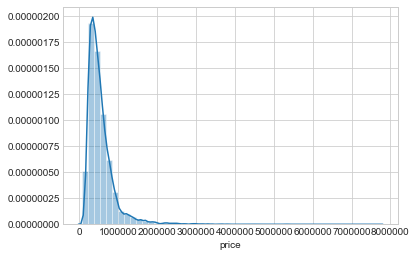

---------------------------------------------------------------------------
series dtype is int64

- Unique Values for bedrooms


3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

n- Null Values 
0

	Describe
count    21597.000000
mean         3.373200
std          0.926299
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         33.000000
Name: bedrooms, dtype: float64


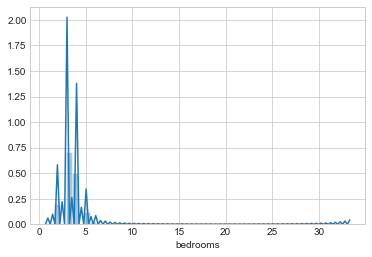

---------------------------------------------------------------------------
series dtype is float64

- Unique Values for bathrooms


2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
5.75       4
0.50       4
8.00       2
6.25       2
6.75       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

n- Null Values 
0

	Describe
count    21597.000000
mean         2.115826
std          0.768984
min          0.500000
25%          1.750000
50%          2.250000
75%          2.500000
max          8.000000
Name: bathrooms, dtype: float64


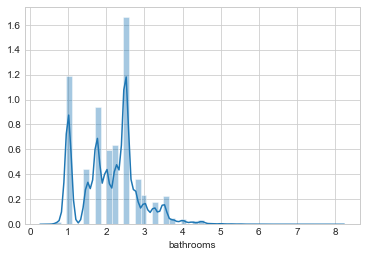

---------------------------------------------------------------------------
series dtype is int64

- Unique Values for sqft_living


1300    138
1400    135
1440    133
1660    129
1010    129
       ... 
4970      1
2905      1
2793      1
4810      1
1975      1
Name: sqft_living, Length: 1034, dtype: int64

n- Null Values 
0

	Describe
count    21597.000000
mean      2080.321850
std        918.106125
min        370.000000
25%       1430.000000
50%       1910.000000
75%       2550.000000
max      13540.000000
Name: sqft_living, dtype: float64


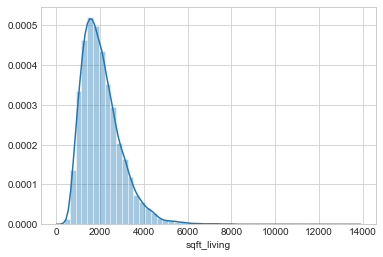

---------------------------------------------------------------------------
series dtype is int64

- Unique Values for sqft_lot


5000      358
6000      290
4000      251
7200      220
7500      119
         ... 
1448        1
38884       1
17313       1
35752       1
315374      1
Name: sqft_lot, Length: 9776, dtype: int64

n- Null Values 
0

	Describe
count    2.159700e+04
mean     1.509941e+04
std      4.141264e+04
min      5.200000e+02
25%      5.040000e+03
50%      7.618000e+03
75%      1.068500e+04
max      1.651359e+06
Name: sqft_lot, dtype: float64


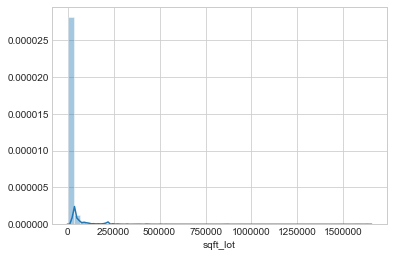

---------------------------------------------------------------------------
series dtype is float64

- Unique Values for floors


1.0    10673
2.0     8235
1.5     1910
3.0      611
2.5      161
3.5        7
Name: floors, dtype: int64

n- Null Values 
0

	Describe
count    21597.000000
mean         1.494096
std          0.539683
min          1.000000
25%          1.000000
50%          1.500000
75%          2.000000
max          3.500000
Name: floors, dtype: float64


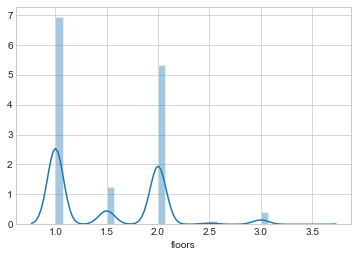

---------------------------------------------------------------------------
series dtype is float64

- Unique Values for waterfront


0.0    19075
1.0      146
Name: waterfront, dtype: int64

n- Null Values 
2376

	Describe
count    19221.000000
mean         0.007596
std          0.086825
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: waterfront, dtype: float64


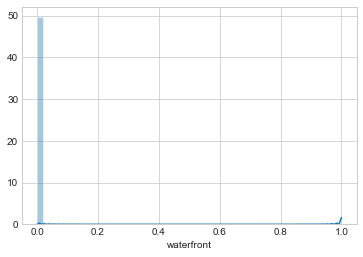

---------------------------------------------------------------------------
series dtype is float64

- Unique Values for view


0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

n- Null Values 
63

	Describe
count    21534.000000
mean         0.233863
std          0.765686
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          4.000000
Name: view, dtype: float64


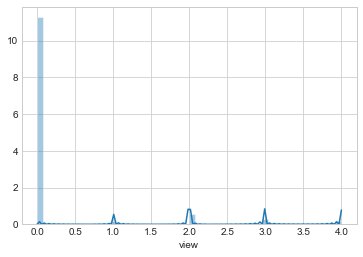

---------------------------------------------------------------------------
series dtype is int64

- Unique Values for condition


3    14020
4     5677
5     1701
2      170
1       29
Name: condition, dtype: int64

n- Null Values 
0

	Describe
count    21597.000000
mean         3.409825
std          0.650546
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: condition, dtype: float64


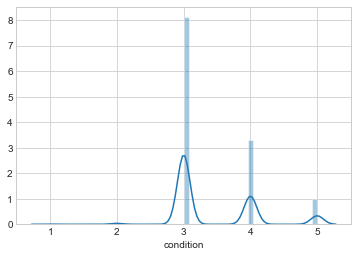

---------------------------------------------------------------------------
series dtype is int64

- Unique Values for grade


7     8974
8     6065
9     2615
6     2038
10    1134
11     399
5      242
12      89
4       27
13      13
3        1
Name: grade, dtype: int64

n- Null Values 
0

	Describe
count    21597.000000
mean         7.657915
std          1.173200
min          3.000000
25%          7.000000
50%          7.000000
75%          8.000000
max         13.000000
Name: grade, dtype: float64


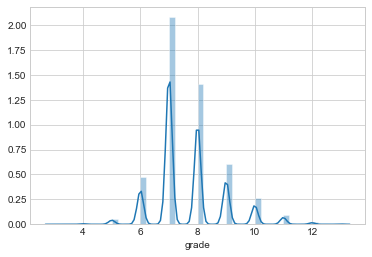

---------------------------------------------------------------------------
series dtype is int64

- Unique Values for sqft_above


1300    212
1010    210
1200    206
1220    192
1140    184
       ... 
2601      1
440       1
2473      1
2441      1
1975      1
Name: sqft_above, Length: 942, dtype: int64

n- Null Values 
0

	Describe
count    21597.000000
mean      1788.596842
std        827.759761
min        370.000000
25%       1190.000000
50%       1560.000000
75%       2210.000000
max       9410.000000
Name: sqft_above, dtype: float64


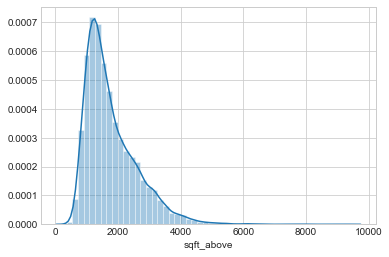

---------------------------------------------------------------------------
series dtype is object

- Unique Values for sqft_basement


0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
1024.0        1
2500.0        1
506.0         1
276.0         1
1548.0        1
Name: sqft_basement, Length: 304, dtype: int64

n- Null Values 
0

	Describe
count     21597
unique      304
top         0.0
freq      12826
Name: sqft_basement, dtype: object
sqft_basement is a string column and cannot be plotted
---------------------------------------------------------------------------
series dtype is int64

- Unique Values for yr_built


2014    559
2006    453
2005    450
2004    433
2003    420
       ... 
1933     30
1901     29
1902     27
1935     24
1934     21
Name: yr_built, Length: 116, dtype: int64

n- Null Values 
0

	Describe
count    21597.000000
mean      1970.999676
std         29.375234
min       1900.000000
25%       1951.000000
50%       1975.000000
75%       1997.000000
max       2015.000000
Name: yr_built, dtype: float64


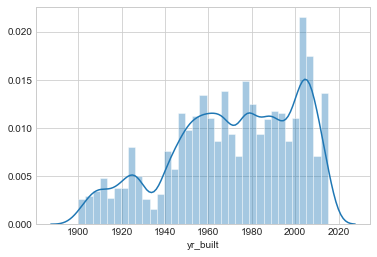

---------------------------------------------------------------------------
series dtype is float64

- Unique Values for yr_renovated


0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

n- Null Values 
3842

	Describe
count    17755.000000
mean        83.636778
std        399.946414
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2015.000000
Name: yr_renovated, dtype: float64


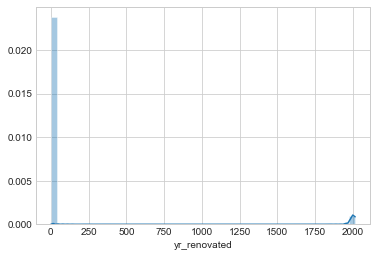

---------------------------------------------------------------------------
series dtype is int64

- Unique Values for zipcode


98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

n- Null Values 
0

	Describe
count    21597.000000
mean     98077.951845
std         53.513072
min      98001.000000
25%      98033.000000
50%      98065.000000
75%      98118.000000
max      98199.000000
Name: zipcode, dtype: float64


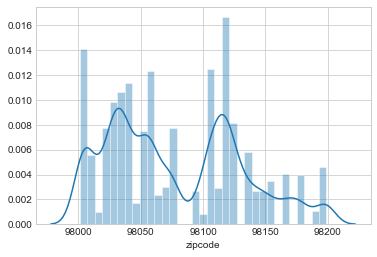

---------------------------------------------------------------------------
series dtype is float64

- Unique Values for lat


47.6624    17
47.5491    17
47.5322    17
47.6846    17
47.6711    16
           ..
47.2785     1
47.4162     1
47.3870     1
47.2313     1
47.2715     1
Name: lat, Length: 5033, dtype: int64

n- Null Values 
0

	Describe
count    21597.000000
mean        47.560093
std          0.138552
min         47.155900
25%         47.471100
50%         47.571800
75%         47.678000
max         47.777600
Name: lat, dtype: float64


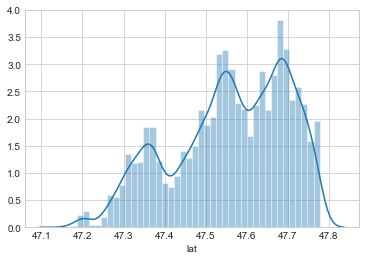

---------------------------------------------------------------------------
series dtype is float64

- Unique Values for long


-122.290    115
-122.300    111
-122.362    104
-122.291    100
-122.372     99
           ... 
-121.403      1
-121.804      1
-121.726      1
-121.895      1
-121.893      1
Name: long, Length: 751, dtype: int64

n- Null Values 
0

	Describe
count    21597.000000
mean      -122.213982
std          0.140724
min       -122.519000
25%       -122.328000
50%       -122.231000
75%       -122.125000
max       -121.315000
Name: long, dtype: float64


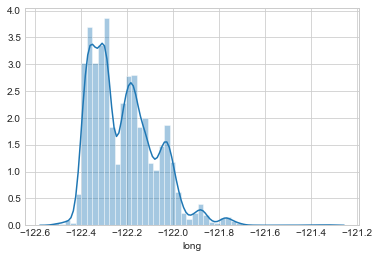

---------------------------------------------------------------------------
series dtype is int64

- Unique Values for sqft_living15


1540    197
1440    195
1560    192
1500    180
1460    169
       ... 
4890      1
2873      1
952       1
3193      1
2049      1
Name: sqft_living15, Length: 777, dtype: int64

n- Null Values 
0

	Describe
count    21597.000000
mean      1986.620318
std        685.230472
min        399.000000
25%       1490.000000
50%       1840.000000
75%       2360.000000
max       6210.000000
Name: sqft_living15, dtype: float64


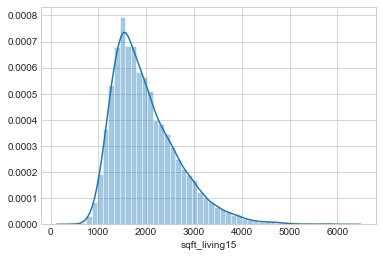

---------------------------------------------------------------------------
series dtype is int64

- Unique Values for sqft_lot15


5000      427
4000      356
6000      288
7200      210
4800      145
         ... 
11036       1
8989        1
871200      1
809         1
6147        1
Name: sqft_lot15, Length: 8682, dtype: int64

n- Null Values 
0

	Describe
count     21597.000000
mean      12758.283512
std       27274.441950
min         651.000000
25%        5100.000000
50%        7620.000000
75%       10083.000000
max      871200.000000
Name: sqft_lot15, dtype: float64


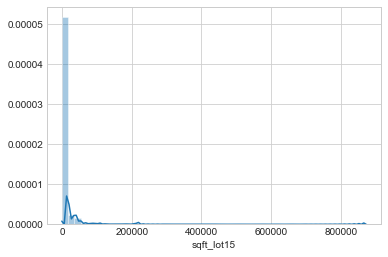

In [6]:
# Loop through the columns with check_columns
for col in df.columns:
    check_column(df[col])

### CONCLUSIONS ON NULL/MISSING VALUES:
#### - 'waterfront' - Lots of null values. STRATEGY: Replace null values with most common value, 0.0
#### -'view' - Some null values. STRATEGY: Replace null values with most common value, 0.0
#### -'yr_renovated' - Lots of null values, column entries mostly have value of 0.0. STRATEGY: Drop entire column from dataset
#### -'sqft_basement' - Placeholder variable '?'. STRATEGY: Replace '?' with most common value, 0.0

### Replace identified null values, remove 'yr_renovated' column, change 'sqft_basement' to categorical

In [7]:
# Replace nulls in 'waterfront' with 0.0
df.waterfront.fillna(value=0.0, inplace=True)

# Replace nulls in 'view' with 0.0
df.view.fillna(value=0.0, inplace=True)

# Drop 'yr_renovated' from dataframe
df.drop('yr_renovated', axis=1, inplace=True)

# Replace '?' values in 'sqft_basement' with 0.0
df.sqft_basement = df.sqft_basement.apply(
    lambda x: 0 if x == '0.0' else 0 if x == '?' else 1)

### CONCLUSIONS ON CATEGORICAL VARIABLES & DATA TYPES
#### - 'sqft_basement' - I want to re-cast as categorical. STRATEGY: Convert to a categorical variable (0 = no basement, 1 = has basement)
#### - 'waterfront', 'view', 'condition', should be categorical variables. STRATEGY: Convert these to categorical variables

In [8]:
# Make basement a categorical variable, create a new colunn with cat.codes
df.sqft_basement = df.sqft_basement.astype('category')
df['basement_coded'] = df.sqft_basement.cat.codes
df.basement_coded.value_counts()

0    13280
1     8317
Name: basement_coded, dtype: int64

In [9]:
# Make waterfront a categorical variable, create new column with cat.codes
df.waterfront = df.waterfront.astype('category')
df['wf_coded'] = df.waterfront.cat.codes
df.wf_coded.value_counts()

0    21451
1      146
Name: wf_coded, dtype: int64

In [10]:
# Make view a categorical variable, create new column with cat.codes
df.view = df.view.astype('category')
df['view_coded'] = df.view.cat.codes
df.view_coded.value_counts()

0    19485
2      957
3      508
1      330
4      317
Name: view_coded, dtype: int64

In [11]:
# Make condition a categorical variable, create new column with cat.codes
df.condition = df.condition.astype('category')
df['cond_coded'] = df.condition.cat.codes
df.cond_coded.value_counts()

2    14020
3     5677
4     1701
1      170
0       29
Name: cond_coded, dtype: int64

## FEATURE ENGINEERING: DISTANCE FROM DOWNTOWN SEATTLE (dist_dt)
#### Using lat_lon_dist_calc function to calculate distance from observation to downtown Seattle
#### I am using this feature to replace the 'lat', 'long', and 'zipcode' columns as I believe it will capture information from all three
#### I hypothesize that there will be a decreasing relationship with price as dist_dt increases

In [12]:
# function to calculate distance (meters) from downtown Seattle using lat and lon
# default lat_0 and lon_0 are downtown Seattle


def lat_lon_dist_calc(lat_1, lon_1, lat_0=47.6050, lon_0=-122.3344):
    """Returns the distance (meters) between two lat/long coordinates.

    Args:
        lat_0 (value or series): latitude of reference point or first point (default is downtown Seattle)
        lon_0 (value or series): longitude of reference point or first point (default is downtown Seattle)
        lat_1 (value or series): latitude of comparison point or second point
        lon_1 (value or series): longitude of comparison point or second point
    """
    R = 6372800  # Earth's radius in meters

    phi1, phi2 = np.radians(lat_0), np.radians(
        lat_1)  # Converting given latitudes to radians
    # Change in latitude conversion to radians
    dphi = np.radians(lat_1 - lat_0)
    # Change in longitude conversion to radians
    dlambda = np.radians(lon_1 - lon_0)

    # Haversine formula to calculate the great-circle distance between two points
    a = np.sin(dphi/2)**2 + np.cos(phi1)*np.cos(phi2)*np.sin(dlambda/2)**2
    c = 2*np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    return R*c

In [13]:
dist_dt = lat_lon_dist_calc(
    lat_1=df.lat, lon_1=df.long, lat_0=47.6050, lon_0=-122.3344)
dist_dt.head()

0    11941.535518
1    12953.726115
2    16618.820484
3    10346.572376
4    21740.172916
dtype: float64

In [14]:
# Add dist_downtown column to df
df = pd.concat([df, dist_dt], axis=1)

In [15]:
df = df.rename(columns={0: 'dist_dt'})

In [16]:
# Drop lat, long, and zipcode columns from df
df = df.drop(['lat', 'long', 'zipcode'], axis=1)

### Question #1: Do any features display high collinearity (>0.75) that should be removed before modeling?

### ASSESS MULTICOLLINEARITY OF FEATURES

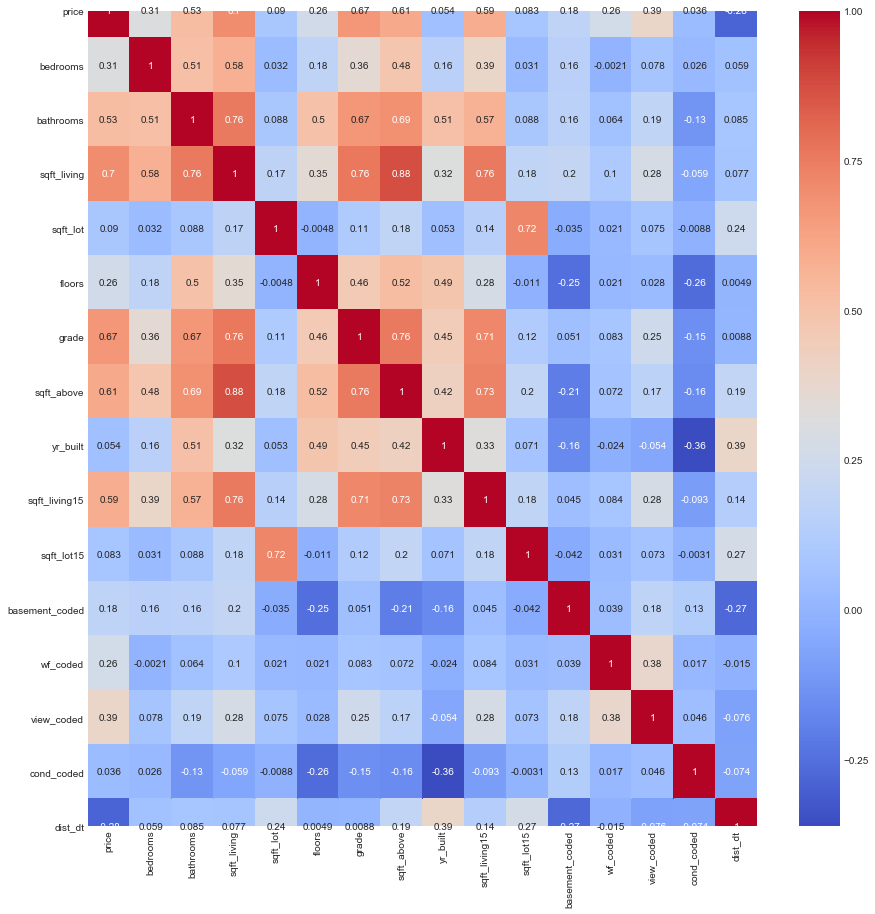

In [17]:
# Plotting correlation matrix to see relationships between independent variables, assess multicollinearity
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

### Question #1 Answer: Multicollinearity observaions
#### - sqft_living is highly correlated (R > 0.75) to sqft_above, bathrooms, grade, sqft_living15
#### -Since it is highly correlated to many other variables, it makes sense to remove sqft_living before proceeding with regression

### Removal of collinear features for scrubbed df

In [18]:
# Dropping sqft_living from scrubbed dataframe due to collinearity (df_scrub)
# Removing sqft_basement, waterfront, view from df_scrub, since we have their cat.codes
df_scrub = df.drop(['sqft_living', 'sqft_basement',
                    'waterfront', 'view', 'condition'], axis=1)

In [19]:
df_scrub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 15 columns):
price             21597 non-null float64
bedrooms          21597 non-null int64
bathrooms         21597 non-null float64
sqft_lot          21597 non-null int64
floors            21597 non-null float64
grade             21597 non-null int64
sqft_above        21597 non-null int64
yr_built          21597 non-null int64
sqft_living15     21597 non-null int64
sqft_lot15        21597 non-null int64
basement_coded    21597 non-null int8
wf_coded          21597 non-null int8
view_coded        21597 non-null int8
cond_coded        21597 non-null int8
dist_dt           21597 non-null float64
dtypes: float64(4), int64(7), int8(4)
memory usage: 1.9 MB


### SUMMARY OF INITIAL DATA SCRUB:
####  - Variables dropped from dataset: 
    - 'id', 'date' - These variabes will not add valuable information to a regression model
    - 'yr_renovated' - So many null and zero values that it will be easier to remove this column entirely
    - 'lat, long, zipcode' - These variables were removed in favor of the engineered feature 'dist_dt', which represents the distance of an observation from downtown Seattle
    - 'sqft_living' - Displayed collinearity with multiple other variables
#### - Variables left as continuous numerical:
    - 'price'
    - 'bedrooms'
    - 'bathrooms'
    - 'sqft_lot'
    - 'floors'
    - 'grade'
    - 'sqft_above'
    - 'yr_built'
    - 'sqft_living15'
    - 'sqft_lot15'
#### - Variables added through feature engineering as continuous numerical:
    - 'dist_dt' - Calculated distance from the observation to downtown Seattle
#### - Variables to be treated as categorical using cat.codes:
    - 'basement_coded' - Represents either '0' (no basement) or '1' (has a basement). Placeholders '?' replaced with 0.
    - 'wf_coded' - Represents either '0' (not waterfront) or '1' (is waterfront). Null values were replaced with 0.
    - 'view_coded' - Index from 0 to 4 on the quality of the view of property. Null values were replaced with 0.
    - 'cond_coded' - Index 0 to 4 on property condition

# EXPLORE

## VISUALIZING DISTRIBUTIONS AND SCATTER PLOTS
    -Check distribution shapes
    -Check linearity of data
    -View potential outliers

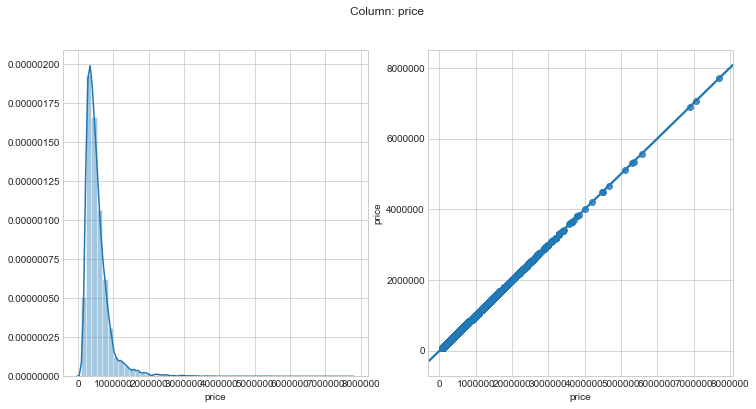

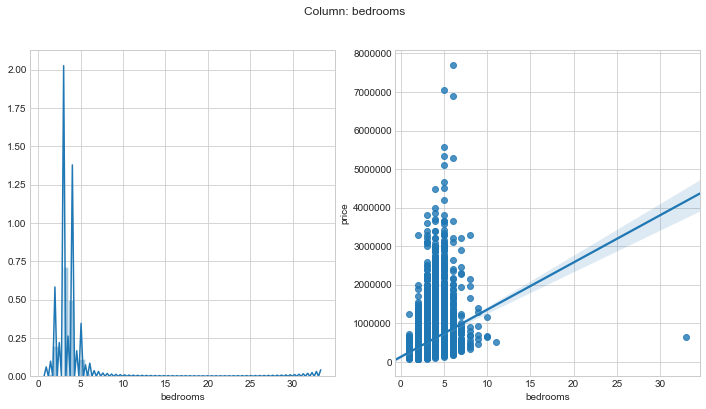

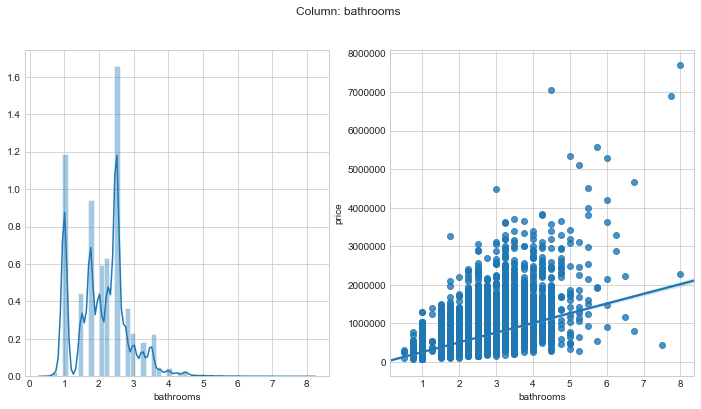

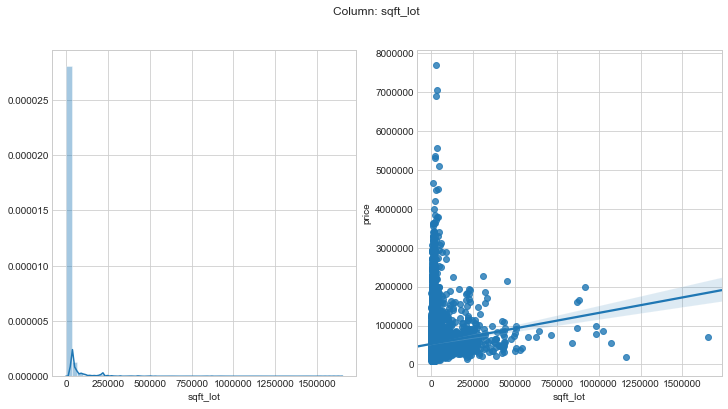

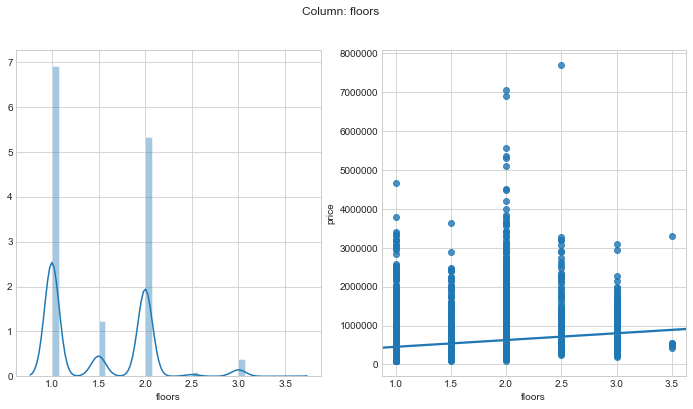

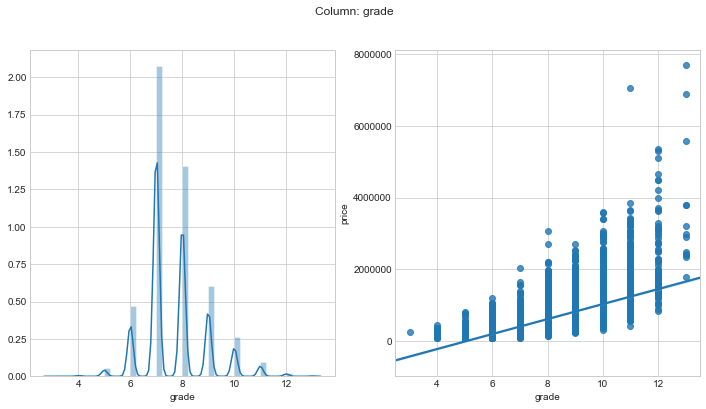

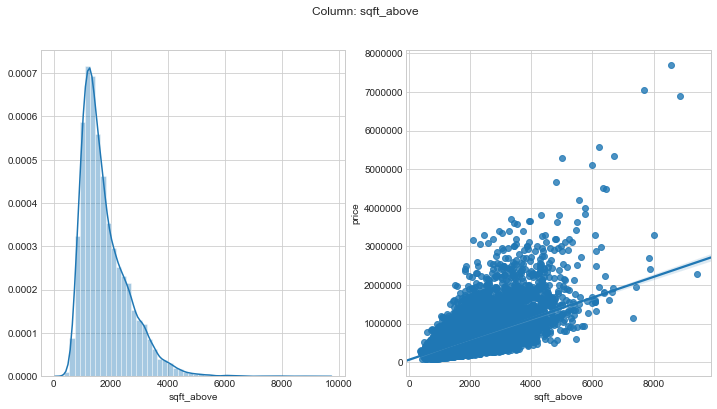

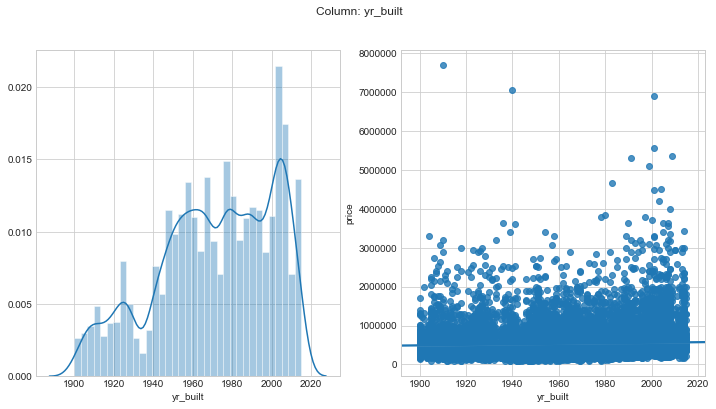

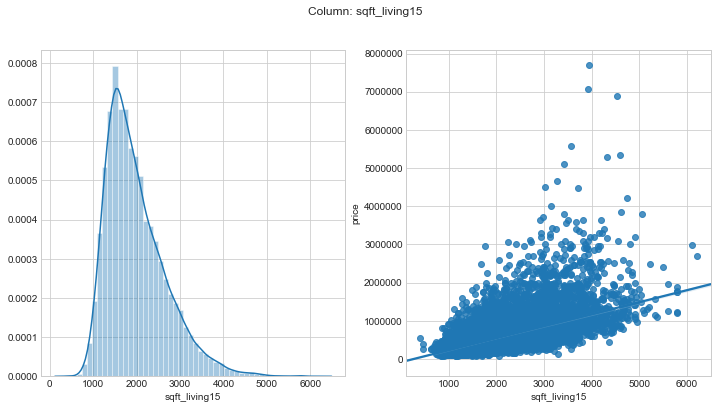

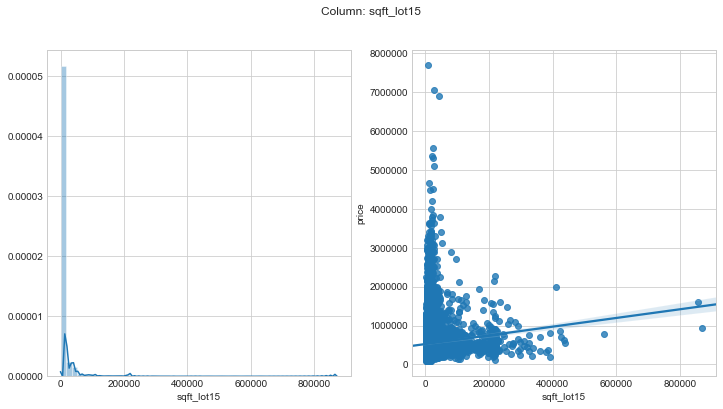

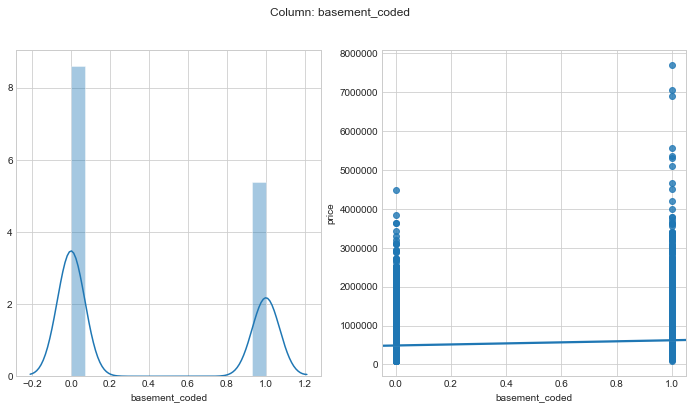

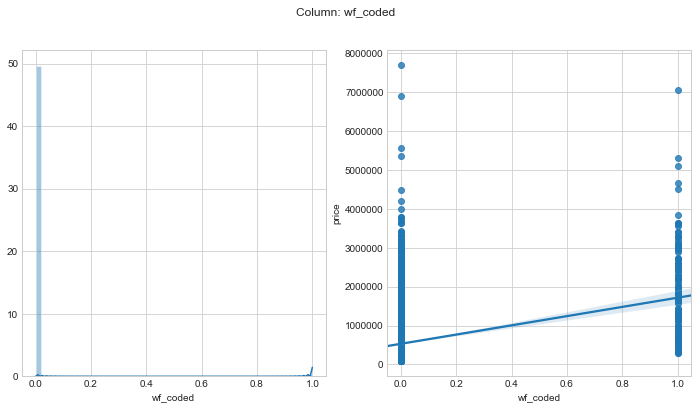

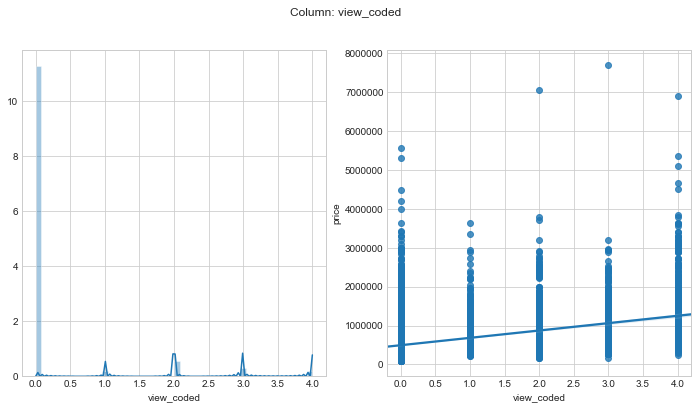

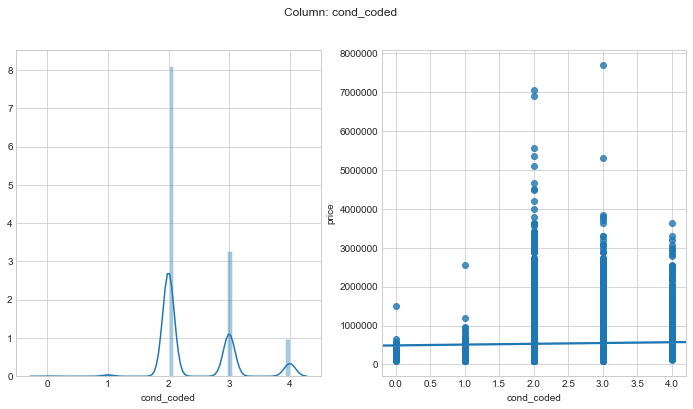

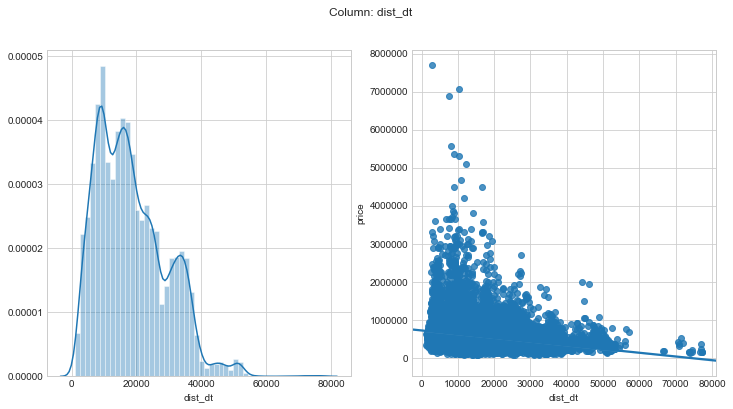

In [20]:
# Plot histogram and scatter/regline plots for each variable in df_scrub
for col in df_scrub.columns:
    plt.figure(figsize=(12, 6))
    plt.subplot(121)
    ax1 = sns.distplot(df_scrub[col])
    plt.subplot(122)
    ax2 = sns.regplot(df_scrub[col], df_scrub.price)
    plt.suptitle(f'Column: {col}')
    plt.show()

- Outliers seem to be present for several variables that may also be skewing distributions
- These outliers should be identified and removed, if appropriate, before continuing

### Question #2: Can variable distributions be improved by objective outlier detection and removal?

## OUTLIER DETECTION AND REMOVAL
#### Outlier detection performed using IQR Scores

In [21]:
# Identify outliers for df_scrub non-categorical variables

non_cat_cols = ['price', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors',
                'grade', 'sqft_above', 'yr_built', 'sqft_living15', 'sqft_lot15', 'dist_dt']
out_index = []

for col in df_scrub[non_cat_cols]:
    q1, q3 = np.percentile(a=df_scrub[col], q=[25, 75])
    iqr = q3 - q1
    lower_bound = q1 - (1.5*iqr)
    upper_bound = q3 + (1.5*iqr)
#     outliers = []
#     for i in df_scrub[col]:
#         if i < lower_bound or i > upper_bound:
#             outliers.append(i)
    out_index.append(list(
        df_scrub[(df_scrub[col] < lower_bound) | (df_scrub[col] > upper_bound)].index))


outlier_index = set(list(itertools.chain.from_iterable(out_index)))

df_out_rem = df_scrub.drop(outlier_index)

display(df_scrub.info())
display(df_out_rem.info())
display(len(outlier_index))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 15 columns):
price             21597 non-null float64
bedrooms          21597 non-null int64
bathrooms         21597 non-null float64
sqft_lot          21597 non-null int64
floors            21597 non-null float64
grade             21597 non-null int64
sqft_above        21597 non-null int64
yr_built          21597 non-null int64
sqft_living15     21597 non-null int64
sqft_lot15        21597 non-null int64
basement_coded    21597 non-null int8
wf_coded          21597 non-null int8
view_coded        21597 non-null int8
cond_coded        21597 non-null int8
dist_dt           21597 non-null float64
dtypes: float64(4), int64(7), int8(4)
memory usage: 1.9 MB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16624 entries, 0 to 21596
Data columns (total 15 columns):
price             16624 non-null float64
bedrooms          16624 non-null int64
bathrooms         16624 non-null float64
sqft_lot          16624 non-null int64
floors            16624 non-null float64
grade             16624 non-null int64
sqft_above        16624 non-null int64
yr_built          16624 non-null int64
sqft_living15     16624 non-null int64
sqft_lot15        16624 non-null int64
basement_coded    16624 non-null int8
wf_coded          16624 non-null int8
view_coded        16624 non-null int8
cond_coded        16624 non-null int8
dist_dt           16624 non-null float64
dtypes: float64(4), int64(7), int8(4)
memory usage: 1.6 MB


None

4973

#### All outliers identified using IQR +/- 1.5 for non-categorical variables have now been removed, and stored in new df (df_out_rem).

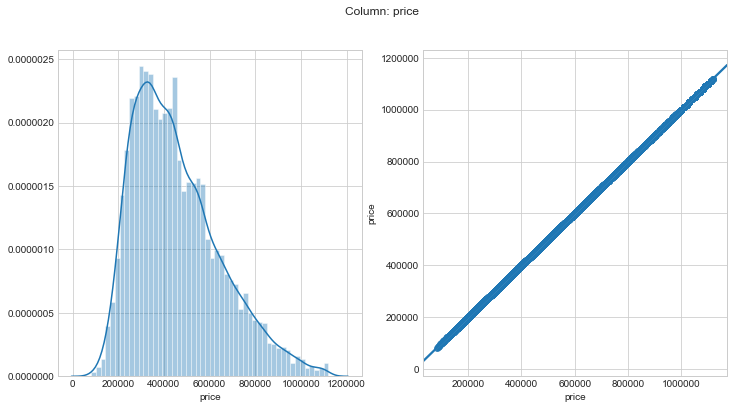

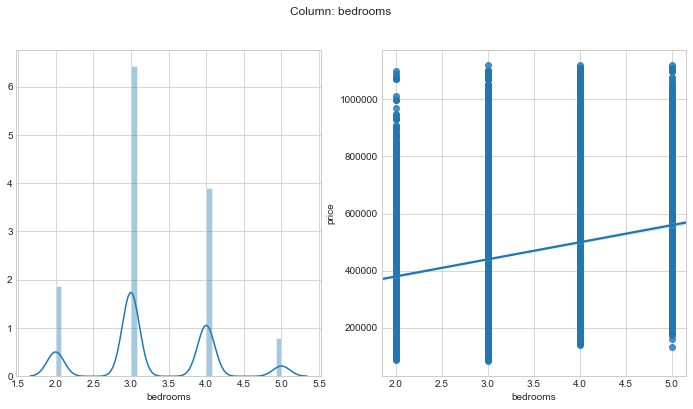

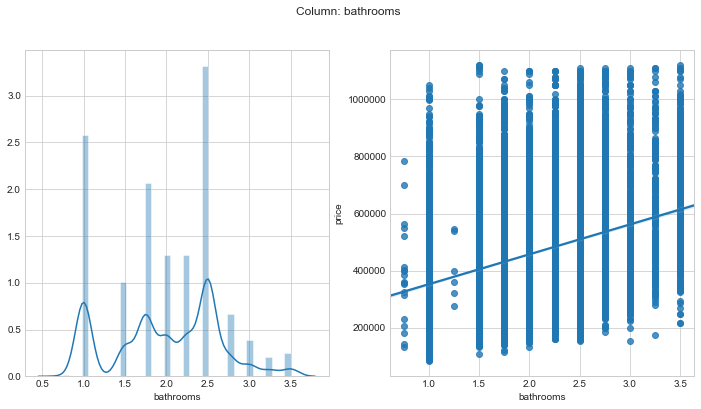

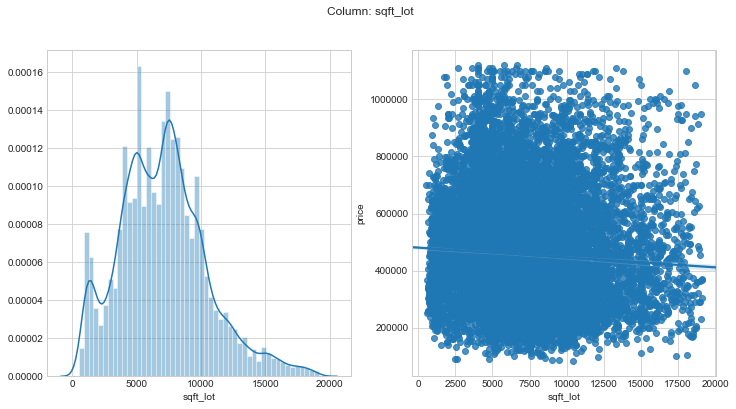

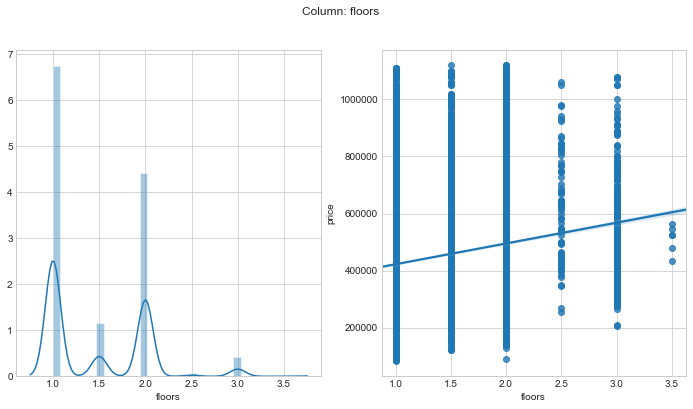

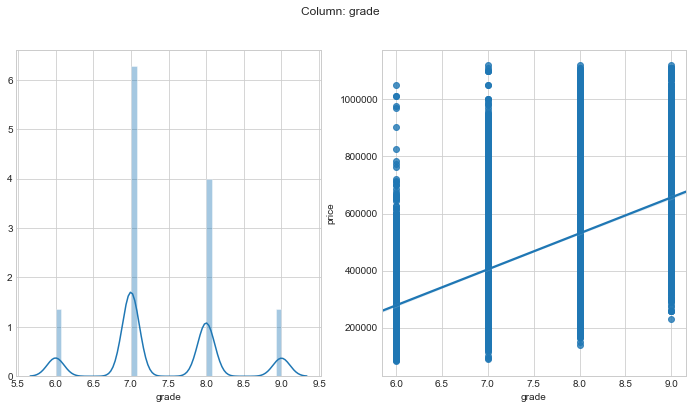

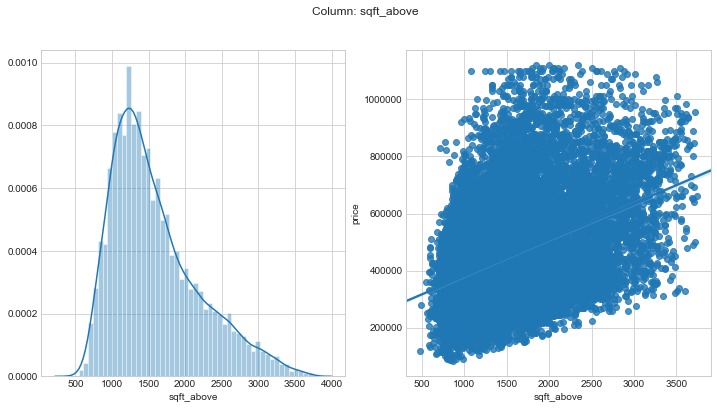

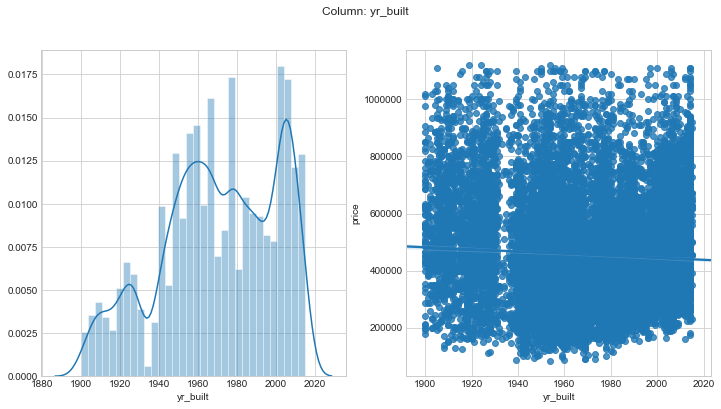

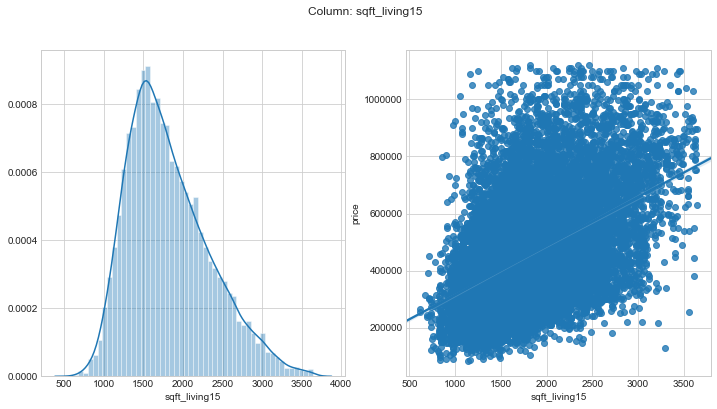

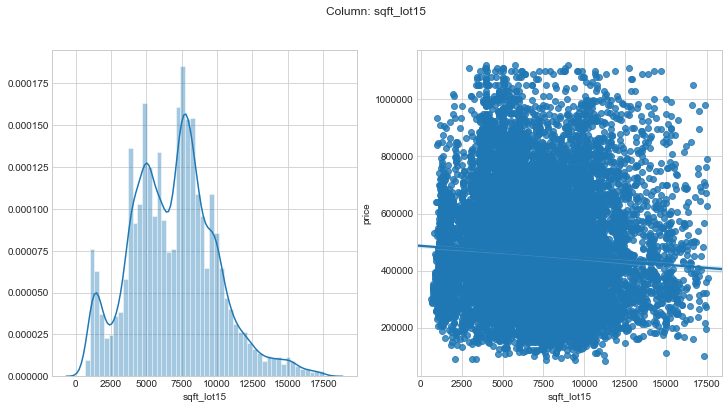

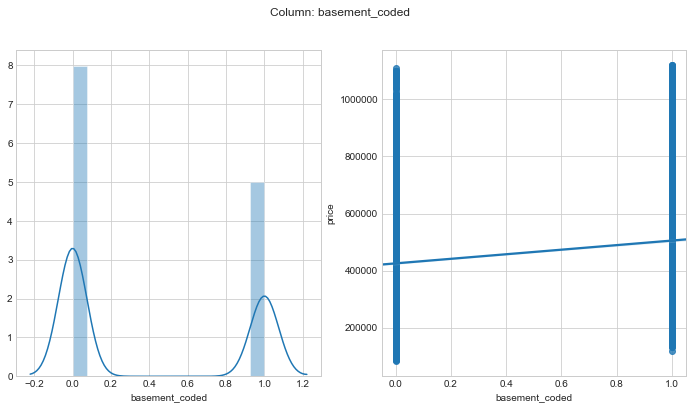

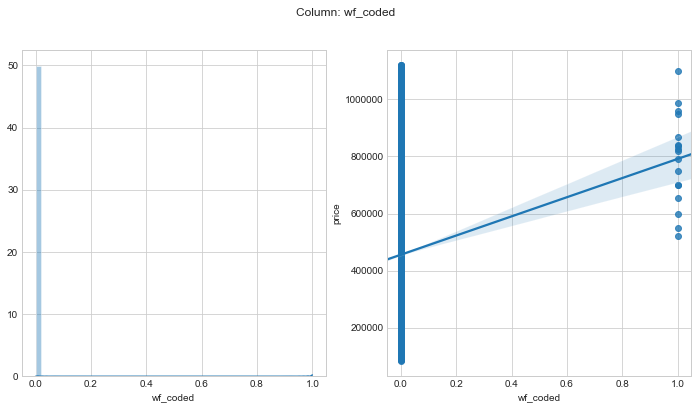

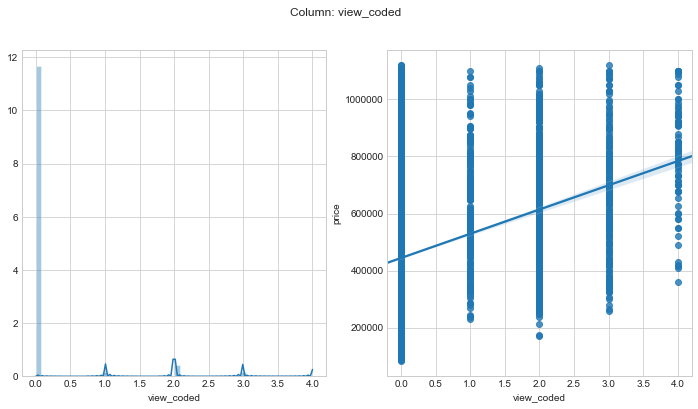

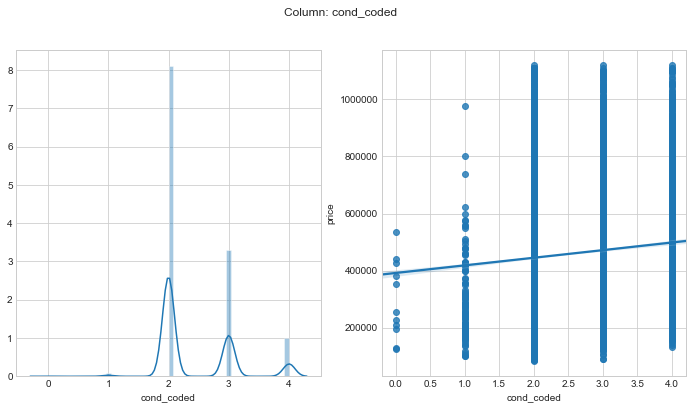

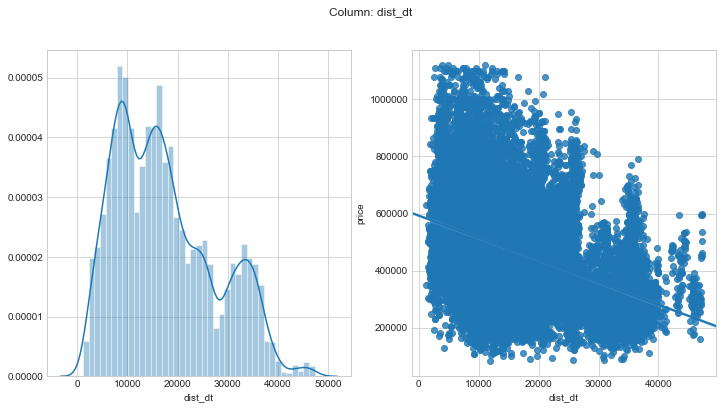

In [22]:
# Plot histogram and scatter/regline plots for each variable in df_out_rem
for col in df_out_rem.columns:
    plt.figure(figsize=(12, 6))
    plt.subplot(121)
    ax1 = sns.distplot(df_out_rem[col])
    plt.subplot(122)
    ax2 = sns.regplot(df_out_rem[col], df_out_rem.price)
    plt.suptitle(f'Column: {col}')
    plt.show()

### Question #2 Answer: Yes, 'price', 'bedrooms', 'bathrooms', 'sqft_lot', 'sqft_above', 'sqft_living15', 'sqft_lot15', and 'dist_dt' are much more normally distributed after outlier detection and removal.

### Question #3: After outlier removal, would any features benefit from log transformation?
    'sqft_above' and 'sqft_living15' are a bit right skewed. I will log transform fhose ones.
    -The others generally have some skew but look ok. I'm going to leave them alone for now.

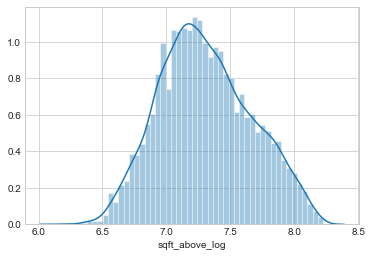

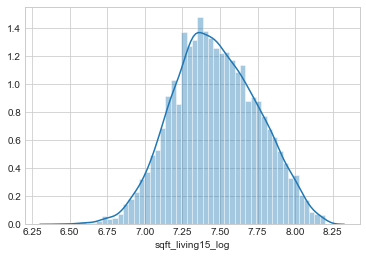

In [23]:
# Perform log transformation on 'sqft_above', and observe resulting histogram

df_out_rem['sqft_above_log'] = np.log(df_out_rem.sqft_above)
sns.distplot(df_out_rem.sqft_above_log)
plt.show()

df_out_rem['sqft_living15_log'] = np.log(df_out_rem.sqft_living15)
sns.distplot(df_out_rem.sqft_living15_log)
plt.show()

### Question #3 Answer: Yes, both 'sqft_above' and 'sqft_living15' both have more normal distributions after log transformation.

In [24]:
# Updading df with transformed variables
df_trans = df_out_rem.drop(['sqft_above', 'sqft_living15'], axis=1)

In [25]:
df_trans.head()

,price,bedrooms,bathrooms,sqft_lot,floors,grade,yr_built,sqft_lot15,basement_coded,wf_coded,view_coded,cond_coded,dist_dt,sqft_above_log,sqft_living15_log
0,221900.0,3,1.00,5650,1.0,7,1955,5650,0,0,0,2,11941.535518,7.073270,7.200425
1,538000.0,3,2.25,7242,2.0,7,1951,7639,1,0,0,2,12953.726115,7.682482,7.432484
2,180000.0,2,1.00,10000,1.0,6,1933,8062,0,0,0,2,16618.820484,6.646391,7.908387
3,604000.0,4,3.00,5000,1.0,7,1965,5000,1,0,0,4,10346.572376,6.956545,7.215240
4,510000.0,3,2.00,8080,1.0,8,1987,7503,0,0,0,2,21740.172916,7.426549,7.495542


## ONE-HOT ENCODING OF CATEGORICAL VARIABLES

#### Need to do this for all categoricals before performing regression
#### - 'basement_coded' and 'wf_coded' are already in the correct format
#### - Use pandas to get dummy variables for 'view_coded' and 'cond_coded'

In [26]:
view_dummies = pd.get_dummies(df_trans.view_coded, drop_first=True, prefix='view')
cond_dummies = pd.get_dummies(df_trans.cond_coded, drop_first=True, prefix='cond')

In [27]:
df_trans = df_trans.drop(['view_coded', 'cond_coded'], axis=1)
df_trans = pd.concat([df_trans, view_dummies, cond_dummies], axis=1)

In [28]:
df_trans.head()

,price,bedrooms,bathrooms,sqft_lot,floors,grade,yr_built,sqft_lot15,basement_coded,wf_coded,dist_dt,sqft_above_log,sqft_living15_log,view_1,view_2,view_3,view_4,cond_1,cond_2,cond_3,cond_4
0,221900.0,3,1.00,5650,1.0,7,1955,5650,0,0,11941.535518,7.073270,7.200425,0,0,0,0,0,1,0,0
1,538000.0,3,2.25,7242,2.0,7,1951,7639,1,0,12953.726115,7.682482,7.432484,0,0,0,0,0,1,0,0
2,180000.0,2,1.00,10000,1.0,6,1933,8062,0,0,16618.820484,6.646391,7.908387,0,0,0,0,0,1,0,0
3,604000.0,4,3.00,5000,1.0,7,1965,5000,1,0,10346.572376,6.956545,7.215240,0,0,0,0,0,0,0,1
4,510000.0,3,2.00,8080,1.0,8,1987,7503,0,0,21740.172916,7.426549,7.495542,0,0,0,0,0,1,0,0


## MIN/MAX SCALING OF FEATURES

In [29]:
X = df_trans.drop(['price'], axis=1)
y = df_trans['price']

X_sc = pd.DataFrame([])

for col in X.columns:
    scaled_var = (X[col] - min(X[col])) / (max(X[col]) - min(X[col]))
    X_sc = pd.concat([X_sc, scaled_var], axis=1)

X_sc.head()

,bedrooms,bathrooms,sqft_lot,floors,grade,yr_built,sqft_lot15,basement_coded,wf_coded,dist_dt,sqft_above_log,sqft_living15_log,view_1,view_2,view_3,view_4,cond_1,cond_2,cond_3,cond_4
0,0.333333,0.090909,0.275495,0.0,0.333333,0.478261,0.295816,0.0,0.0,0.233689,0.438120,0.435422,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.333333,0.545455,0.360990,0.4,0.333333,0.443478,0.413516,1.0,0.0,0.255618,0.734854,0.566527,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.000000,0.090909,0.509103,0.0,0.000000,0.286957,0.438547,0.0,0.0,0.335021,0.230196,0.835396,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.666667,0.818182,0.240589,0.0,0.333333,0.565217,0.257353,1.0,0.0,0.199135,0.381266,0.443792,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.333333,0.454545,0.405993,0.0,0.666667,0.756522,0.405468,0.0,0.0,0.445974,0.610195,0.602153,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


# MODEL

## RECURSIVE FEATURE ELIMINATION (RFE) - INITIAL MODEL

In [30]:
# Use recursive feature selection from sklearn to start building model
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

# Testing out the RFE to find the 5 most important features
selector = RFE(linreg, n_features_to_select=1)
selector = selector.fit(X_sc, y)

In [31]:
selected_features = list(zip(selector.support_, X.columns))
ranked_features = list(zip(selector.ranking_, X.columns))

In [32]:
ranked_features

[(17, 'bedrooms'),
 (12, 'bathrooms'),
 (20, 'sqft_lot'),
 (19, 'floors'),
 (5, 'grade'),
 (6, 'yr_built'),
 (18, 'sqft_lot15'),
 (16, 'basement_coded'),
 (7, 'wf_coded'),
 (2, 'dist_dt'),
 (3, 'sqft_above_log'),
 (1, 'sqft_living15_log'),
 (14, 'view_1'),
 (15, 'view_2'),
 (13, 'view_3'),
 (4, 'view_4'),
 (11, 'cond_1'),
 (10, 'cond_2'),
 (9, 'cond_3'),
 (8, 'cond_4')]

### Now I want to compare r^2 to MSE as I increase # of features, to find point of diminishing returns

In [33]:
r_squared = []
for x in range(1, len(X_sc.columns)):
    selector = RFE(linreg, n_features_to_select=x)
    selector.fit(X_sc, y)
    linreg.fit(X_sc[X_sc.columns[selector.support_]], y)
    r_sq = linreg.score(X_sc[X_sc.columns[selector.support_]], y)
    r_squared.append(r_sq)

In [34]:
from sklearn.metrics import mean_squared_error

mse = []
for x in range(1, len(X_sc.columns)):
    selector = RFE(linreg, n_features_to_select=x)
    selector.fit(X_sc, y)
    linreg.fit(X_sc[X_sc.columns[selector.support_]], y)
    y_pred = linreg.predict(X_sc[X_sc.columns[selector.support_]])
    mse.append(mean_squared_error(y, y_pred))

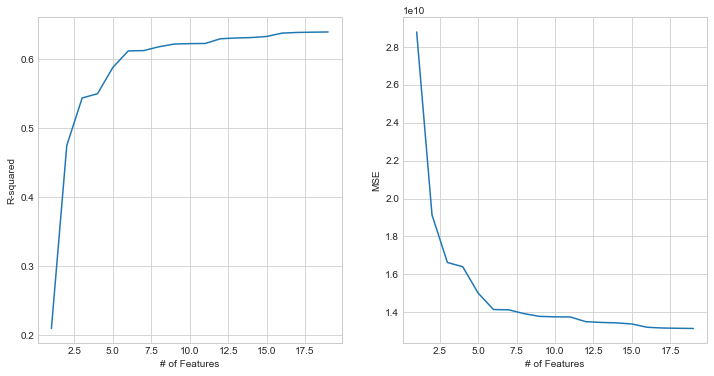

In [35]:
plt.figure(figsize=(12,6))
plt.title('R-squared and MSE vs # of Features')

ax1 = plt.subplot(121)
ax1.plot(range(1, len(X_sc.columns)), r_squared)
ax1.set_ylabel('R-squared')
ax1.set_xlabel('# of Features')

ax2 = plt.subplot(122)
ax2.plot(range(1, len(X_sc.columns)), mse)
ax2.set_ylabel('MSE')
ax2.set_xlabel('# of Features')

plt.show()

### The above R-squared and MSE 'elbow' plots indicate that I can safely select 5 as the number of features. Below I am using the most important 5 features for linear regression using statsmodels, as indicated by RFE.

In [36]:
import statsmodels.api as sm
predictors = X_sc[['sqft_living15_log', 'dist_dt', 'sqft_above_log', 'view_4', 'grade']]
predictors_int = sm.add_constant(predictors)
model_RFE = sm.OLS(y, predictors_int).fit()
model_RFE.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.588
Model:                            OLS   Adj. R-squared:                  0.588
Method:                 Least Squares   F-statistic:                     4747.
Date:                Wed, 30 Oct 2019   Prob (F-statistic):               0.00
Time:                        09:30:17   Log-Likelihood:            -2.1835e+05
No. Observations:               16624   AIC:                         4.367e+05
Df Residuals:                   16618   BIC:                         4.368e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              2.154e+05   3923.760     54.891      0.000    2.08e+05    2.23e+05
sqft_living15_log  3.181e+05   8342.542     38.128      0.000    3.02e+05    3.34e+05
dist_dt           -4.916e+05   4791.176   -102.605      0.000   -5.01e+05   -4.82e+05
sqft_above_log     2.492e+05   8177.071     30.481      0.000    2.33e+05    2.65e+05
view_4             2.107e+05   1.38e+04     15.280      0.000    1.84e+05    2.38e+05
grade              1.902e+05   4848.677     39.227      0.000    1.81e+05       2e+05
==============================================================================
Omnibus:                      659.886   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              803.517
Skew:                           0.449   Prob(JB):                    3.30e-175
Kurtosis:                       3.594   Cond. No.                         20.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Initial model uses the following five features: 'sqft_living15_log', 'dist_dt', 'sqft_above_log', 'view_4', and 'grade'
#### -R-squared = 0.59 (R-squared and adj-R-squared are identical)
#### -p-value = 0.00
#### -Skewness and kurtosis values indicate that the distribution of residuals is likely normal and homoscedastic

# iNTERPRET

## CHECK MODEL AGAINST LINEAR REGRESSION ASSUMPTIONS

### 1) Assess normality of Residuals using Histograms and Q-Q Plots

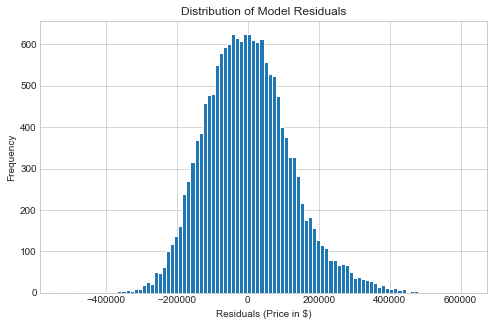

In [37]:
plt.figure(figsize=(8, 5))
plt.hist(model_RFE.resid, bins=100)
plt.xlabel('Residuals (Price in $)')
plt.ylabel('Frequency')
plt.title('Distribution of Model Residuals')
plt.show()

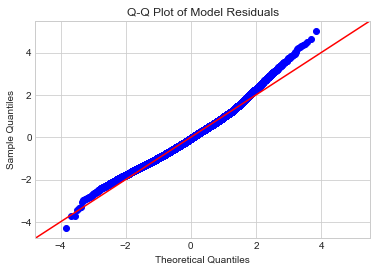

In [38]:
sm.graphics.qqplot(model_RFE.resid, line='45', fit=True)
plt.title('Q-Q Plot of Model Residuals')
plt.show()

### 2) Assess Heteroscedasticity of Residuals

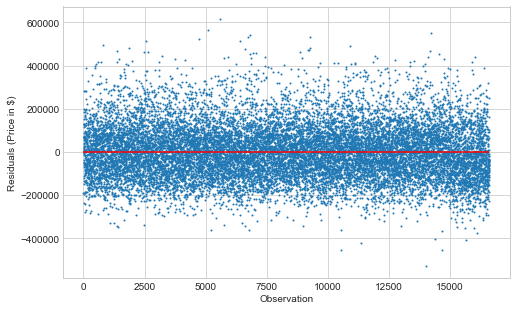

In [39]:
res_x = list(range(0, len(X_sc)))

plt.figure(figsize=(8, 5))
plt.scatter(res_x, model_RFE.resid, s=1)
plt.hlines(y=0, xmin=0, xmax=len(X_sc), color='red')
plt.xlabel('Observation')
plt.ylabel('Residuals (Price in $)')
plt.show()

### CONCLUSION: It appears the assumptions of linear regression are not violated. The Q-Q plot and histogram of residuals indicate some right-skew, but this does not seem alarming. The model residuals appear to be homoscedastic.

## MODEL VALIDATION

### Train-Test-Split Validation

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

In [41]:
X_train, X_test, y_train, y_test = train_test_split(
    predictors, y, test_size=0.25)

In [42]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [43]:
train_rmse = np.sqrt(mean_squared_error(y_train, y_hat_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_hat_test))
print('Train Root Mean Squarred Error ($ Price):', train_rmse)
print('Test Root Mean Squarred Error($ Price):', test_rmse)

Train Root Mean Squarred Error ($ Price): 122077.00978881381
Test Root Mean Squarred Error($ Price): 123770.74293632417


#### The Train and Test RMSE's are nearly identical. This tells us that our model is not being undertrained or overtained on the train-test-split - there is a good balance here.

#### The train-test-split tells us that the standard deviation of model residuals is about $122-123k.

### K-fold Cross Validation

In [60]:
from sklearn.model_selection import cross_val_score

k_fold_r2 = np.mean(cross_val_score(linreg, predictors, y, cv=10,  scoring='r2'))
print(f'k-fold R2 is: {k_fold_r2}')

k-fold R2 is: 0.5813331955621732


In [44]:
from sklearn.model_selection import cross_val_score

k_fold_RMSE = np.mean(np.sqrt(-cross_val_score(linreg,
                                               predictors, y, cv=10,  scoring='neg_mean_squared_error')))
print(f'k-fold RMSE is: {k_fold_RMSE}')

k-fold RMSE is: 122881.68252268476


#### The k-fold RMSE for 10 bins is ~ $123k, virtually identical to the RMSE from train-test-split.

## INITIAL MODEL SUMMARY
#### Five features selected ('sqft_living15_log', 'dist_dt', 'sqft_above_log', 'view_4', 'grade') using sklearn RFE
#### Linear regression model produced using these five features in statsmodels OLS
#### R-squared = 0.59
#### Residuals are primarily normally distributed, homoscedastic
#### RMSE of train-test-split and k-fold cross validation is ~ $123k

## REVISED MODEL
### Goal: See if I can improve the model r-squared value while reducing errors, and maintaining predictability of the initial model.
### Strategy: 
### 1) Check for any missed non-linearity between the variables that could possibly be corrected
### 2) Include zip codes as a categorical variable in the list of features (previously excluded)
### 3) Instead of RFE, check simple linear regression for each predictor on its own to choose top 5 features

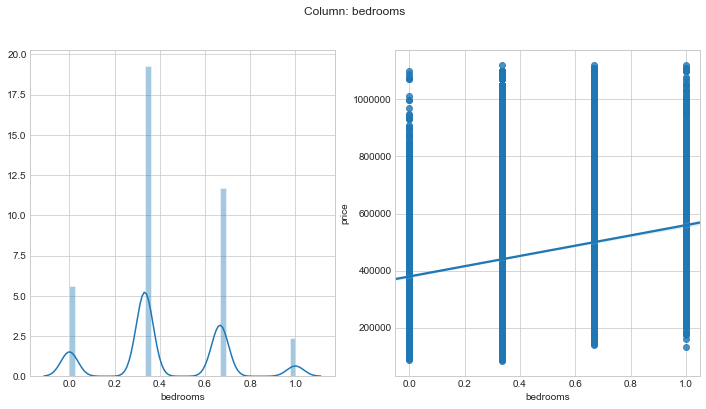

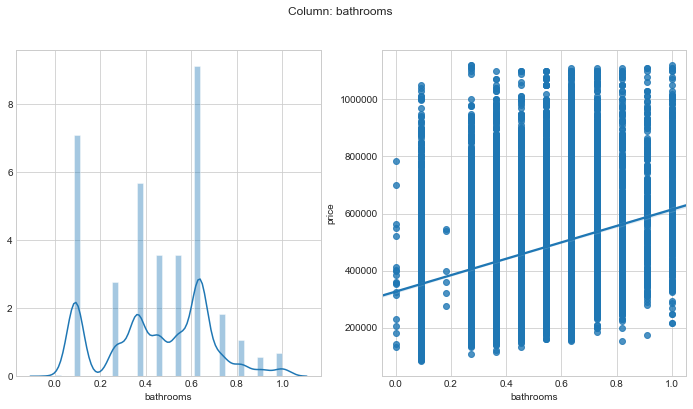

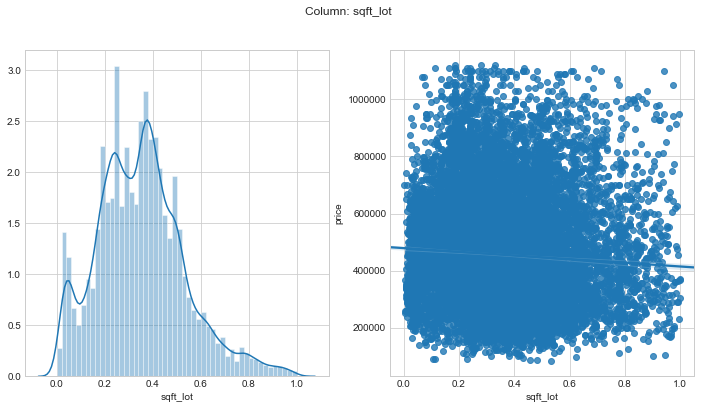

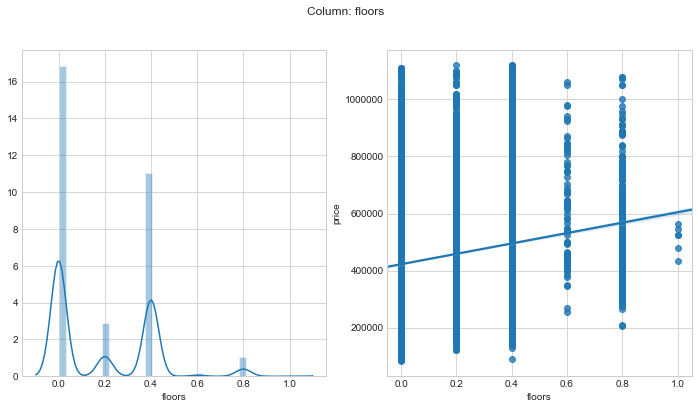

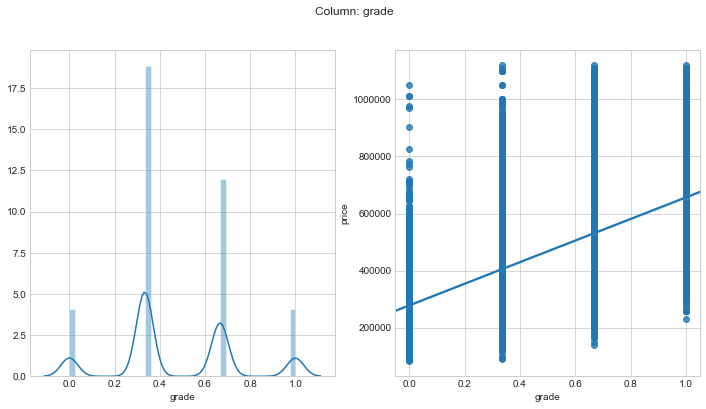

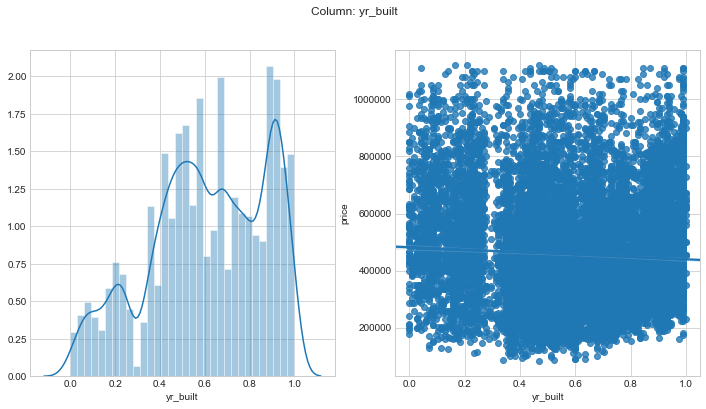

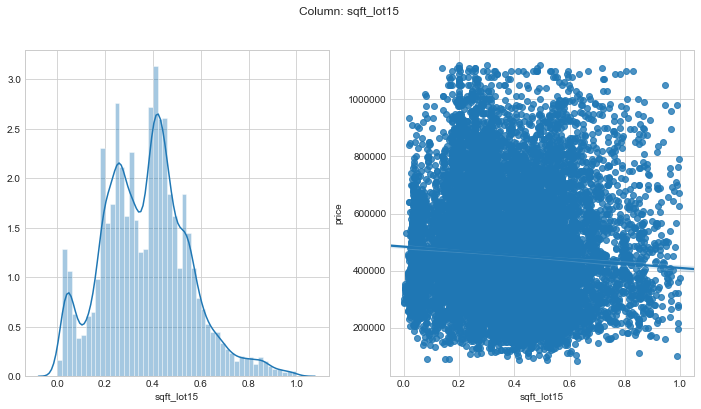

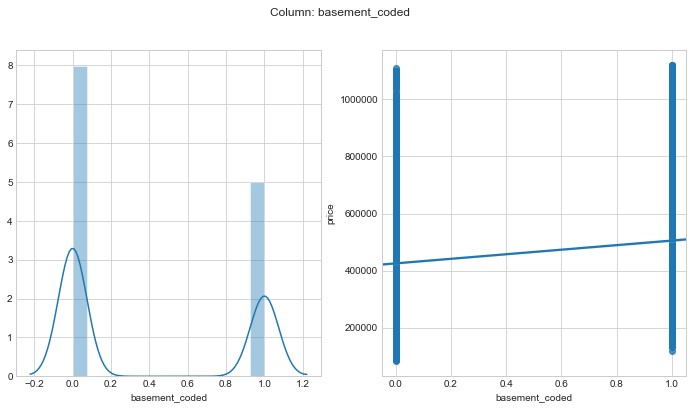

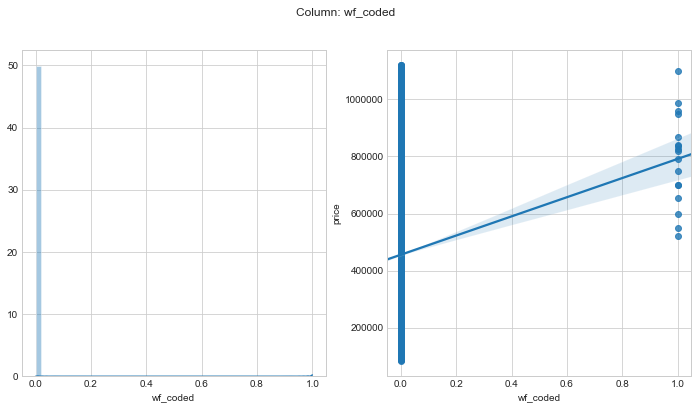

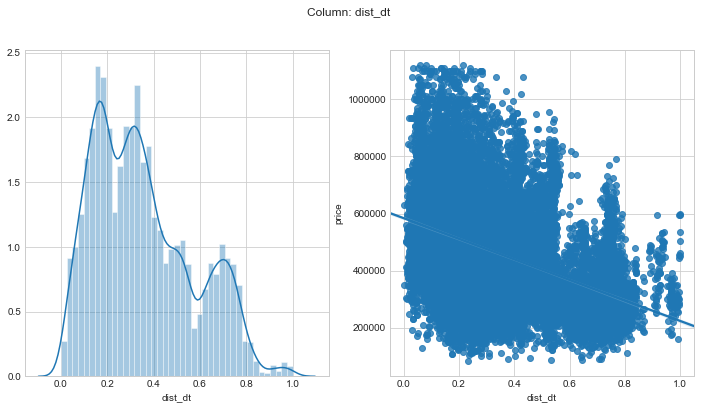

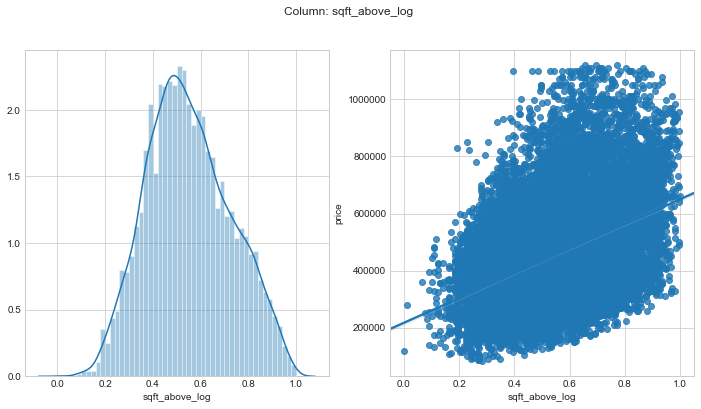

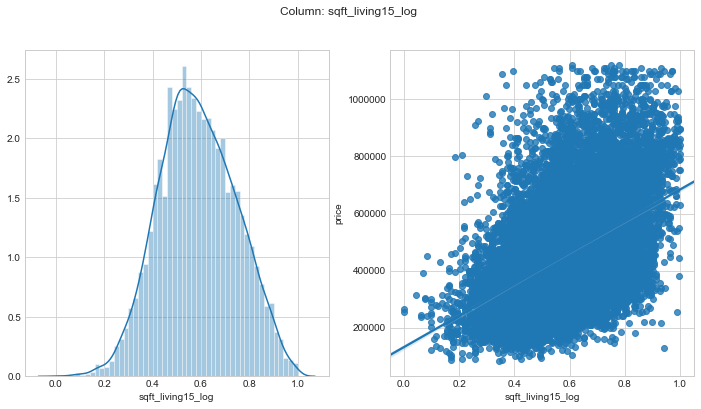

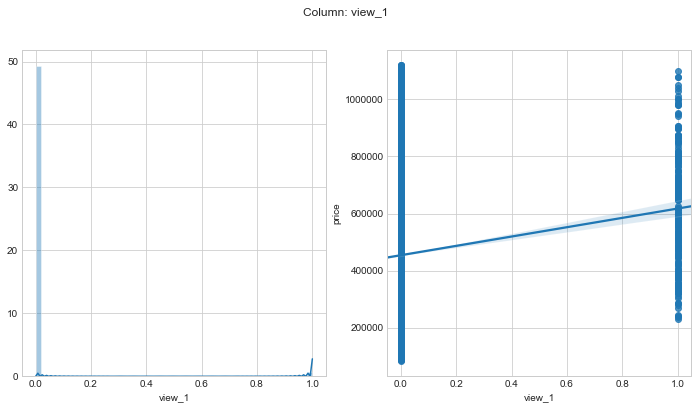

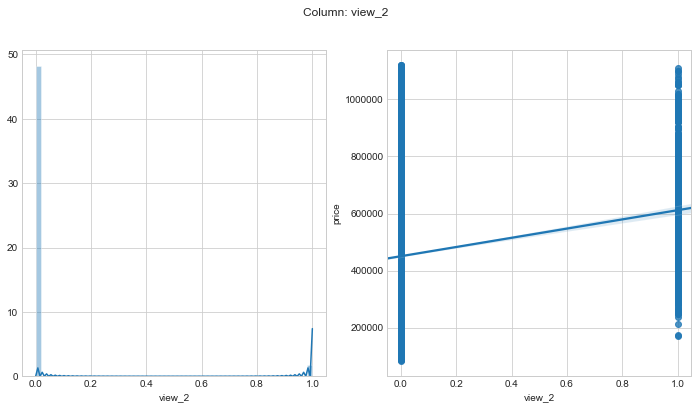

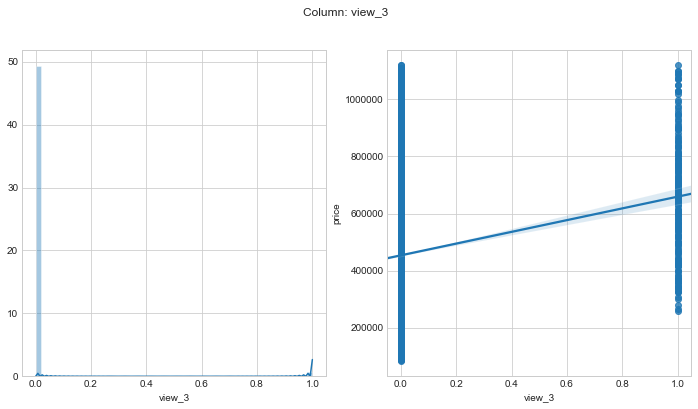

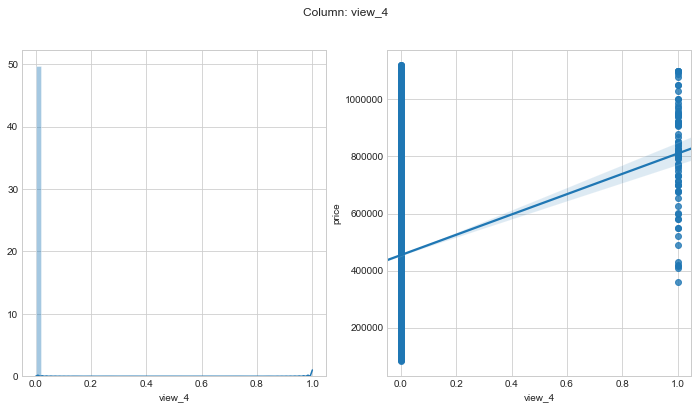

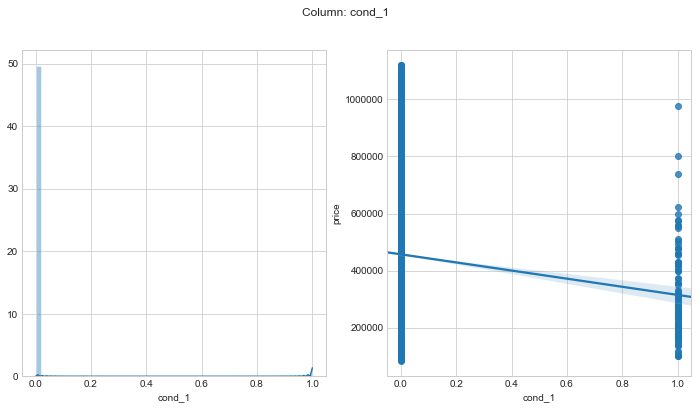

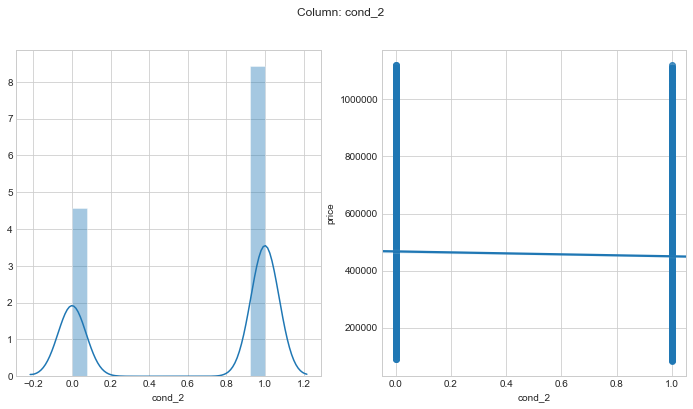

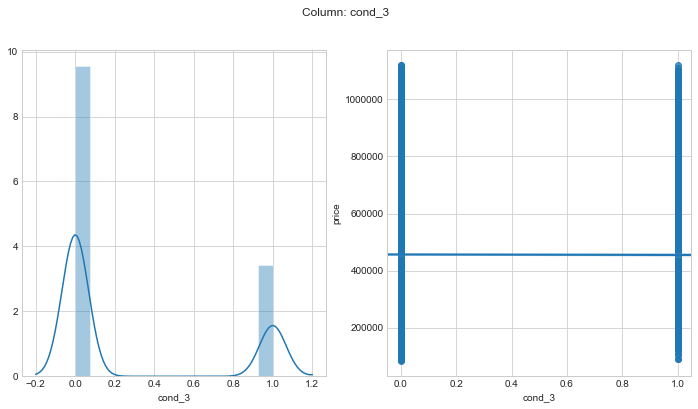

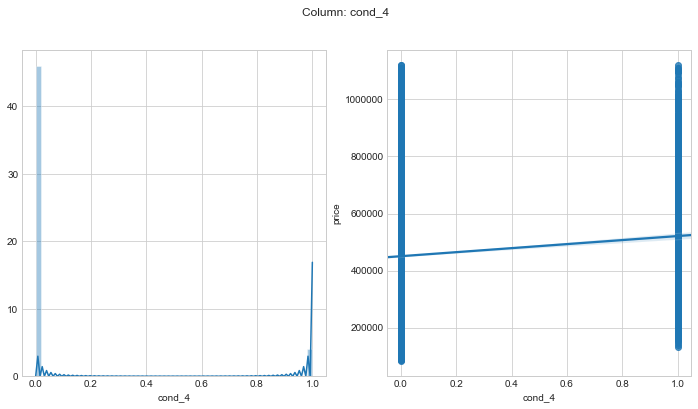

In [45]:
# Strategy Step 1: Check for missed non-linearity
# Re-examine previous plots for comparison of features to price
for col in X_sc.columns:
    plt.figure(figsize=(12, 6))
    plt.subplot(121)
    ax1 = sns.distplot(X_sc[col])
    plt.subplot(122)
    ax2 = sns.regplot(X_sc[col], y)
    plt.suptitle(f'Column: {col}')
    plt.show()

### I don't see an obvious transformation to improve the linearity of any features, so I will move on to step 2.

In [46]:
# Strategy Step 2: Include zip codes in features for selection

# Get zip codes from original data, and convert column to category
df_2 = pd.read_csv('kc_house_data.csv')
df_zip = pd.DataFrame([])
df_zip['zipcodes'] = df_2.zipcode
df_zip.zipcodes = df_zip.zipcodes.astype('category')
df_zip['zip_coded'] = df_zip.zipcodes.cat.codes

# Remove rows previously identified as contaning outliers using outLier_index
df_zip_out = df_zip.drop(outlier_index)

In [47]:
# Remove old column of zip codes
df_zip_coded = df_zip_out.drop(['zipcodes'], axis=1)
df_zip_coded.head()

,zip_coded
0,66
1,55
2,16
3,58
4,37


In [48]:
# Strategy Step 3: Run simple linear regression for each predictor on its own against price to determine top 5 features

# Concatenate dataframe with zip code data
df_rev = pd.concat([df_trans, df_zip_coded], axis=1)
df_rev.info()

X_rev = df_rev
y_rev = y

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16624 entries, 0 to 21596
Data columns (total 22 columns):
price                16624 non-null float64
bedrooms             16624 non-null int64
bathrooms            16624 non-null float64
sqft_lot             16624 non-null int64
floors               16624 non-null float64
grade                16624 non-null int64
yr_built             16624 non-null int64
sqft_lot15           16624 non-null int64
basement_coded       16624 non-null int8
wf_coded             16624 non-null int8
dist_dt              16624 non-null float64
sqft_above_log       16624 non-null float64
sqft_living15_log    16624 non-null float64
view_1               16624 non-null uint8
view_2               16624 non-null uint8
view_3               16624 non-null uint8
view_4               16624 non-null uint8
cond_1               16624 non-null uint8
cond_2               16624 non-null uint8
cond_3               16624 non-null uint8
cond_4               16624 non-null uint8

In [49]:
# Running simple linear regression for each predictor on its own to select top 5 features

# This cell is modified version of code provided in starter notebook by J.I.
# Statsmodels ~C() within OLS should be able to handle the zipcodes category without having to manually one-hot encode

import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
import statsmodels.stats.api as sms


# log_price = np.log(df['price'])
# df['log_price'] = log_price

target_var = 'price'
col_names = df_rev.drop('price', axis=1).columns

# Create results list for saving the output statstics for each predictor
results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p-value']]

for idx, val in enumerate(col_names):

    # Use the names of the columns to determine format of forumla
    if val.startswith('zip'):

        df_rev[val] = df_rev[val].astype('category').cat.as_ordered()
        f = f'{str(target_var)}~C({val})'

    else:

        f = f'{str(target_var)}~{val}'

    # Run the ols models
    model = smf.ols(formula=f, data=df_rev).fit()
    model.summary()

    # Append results
    results.append([val, model.rsquared, model.params[0],
                    model.params[1], model.pvalues[1]])

# Turn results into dataframe with correct index and columns
res_df = pd.DataFrame(results)
res_df.columns = res_df.iloc[0]
res_df = res_df[1:]
res_df.set_index('ind_var', inplace=True)
res_df.sort_values('r_squared', ascending=False)

,r_squared,intercept,slope,p-value
ind_var,,,,
zip_coded,0.5319,268055,-32083.2,0.01067
grade,0.288459,-477864,126042,0
sqft_living15_log,0.209721,-1.87508e+06,312114,0
dist_dt,0.162188,592555,-7.80051,0
sqft_above_log,0.158279,-1.08583e+06,211020,0
bathrooms,0.127073,247880,104613,0
bedrooms,0.0600529,259736,59901.4,7.31859e-226
floors,0.043065,349555,72790.8,3.87036e-161
basement_coded,0.0415507,425278,79951.7,2.00822e-155


In [50]:
# Revised model, based on individual R-squared, will include 'zip_coded', 'grade', 'sqft_living15_log', 'dist_dt', 'sqft_above_log'
import statsmodels.formula.api as smf

f_rev = 'price~C(zip_coded)+grade+sqft_living15_log+dist_dt+sqft_above_log'
model_rev = smf.ols(formula=f_rev, data=df_rev).fit()
model_rev.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     743.6
Date:                Wed, 30 Oct 2019   Prob (F-statistic):               0.00
Time:                        09:30:54   Log-Likelihood:            -2.1364e+05
No. Observations:               16624   AIC:                         4.274e+05
Df Residuals:                   16550   BIC:                         4.280e+05
Df Model:                          73                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           -1.93e+06   2.86e+04    -67.572      0.000   -1.99e+06   -1.87e+06
C(zip_coded)[T.1]   3.783e+04   8915.971      4.243      0.000    2.04e+04    5.53e+04
C(zip_coded)[T.2]   9829.5916   8031.561      1.224      0.221   -5913.130    2.56e+04
C(zip_coded)[T.3]   3.847e+05   1.39e+04     27.672      0.000    3.57e+05    4.12e+05
C(zip_coded)[T.4]    2.33e+05   1.37e+04     16.978      0.000    2.06e+05     2.6e+05
C(zip_coded)[T.5]   1.944e+05   1.11e+04     17.519      0.000    1.73e+05    2.16e+05
C(zip_coded)[T.6]   1.451e+05    1.3e+04     11.137      0.000     1.2e+05    1.71e+05
C(zip_coded)[T.7]   1.673e+05   1.08e+04     15.453      0.000    1.46e+05    1.88e+05
C(zip_coded)[T.8]   1.334e+05    1.6e+04      8.312      0.000    1.02e+05    1.65e+05
C(zip_coded)[T.9]   6.545e+04   1.07e+04      6.091      0.000    4.44e+04    8.65e+04
C(zip_coded)[T.10]  1.166e+05   1.78e+04      6.561      0.000    8.17e+04    1.51e+05
C(zip_coded)[T.11]  6.735e+04   9785.368      6.883      0.000    4.82e+04    8.65e+04
C(zip_coded)[T.12]  1.818e+05   9.29e+04      1.958      0.050    -201.001    3.64e+05
C(zip_coded)[T.13]  -522.9736   7051.772     -0.074      0.941   -1.43e+04    1.33e+04
C(zip_coded)[T.14]  1.696e+05   2.09e+04      8.101      0.000    1.29e+05    2.11e+05
C(zip_coded)[T.15]  1.569e+05   9728.419     16.133      0.000    1.38e+05    1.76e+05
C(zip_coded)[T.16]  4.545e+04   1.04e+04      4.364      0.000     2.5e+04    6.59e+04
C(zip_coded)[T.17]  1.634e+05   8562.281     19.082      0.000    1.47e+05     1.8e+05
C(zip_coded)[T.18] -2.693e+04   8404.799     -3.204      0.001   -4.34e+04   -1.05e+04
C(zip_coded)[T.19] -3.685e+04   8813.063     -4.181      0.000   -5.41e+04   -1.96e+04
C(zip_coded)[T.20] -2.307e+04   1.09e+04     -2.121      0.034   -4.44e+04   -1752.325
C(zip_coded)[T.21]  2.132e+05   1.12e+04     19.060      0.000    1.91e+05    2.35e+05
C(zip_coded)[T.22]  9.255e+04   1.01e+04      9.195      0.000    7.28e+04    1.12e+05
C(zip_coded)[T.23]  3.001e+04   7010.131      4.282      0.000    1.63e+04    4.38e+04
C(zip_coded)[T.24]  4.832e+05   3.97e+04     12.181      0.000    4.05e+05    5.61e+05
C(zip_coded)[T.25]  3.128e+05   1.42e+04     21.964      0.000    2.85e+05    3.41e+05
C(zip_coded)[T.26]  -380.1147   7118.389     -0.053      0.957   -1.43e+04    1.36e+04
C(zip_coded)[T.27]  1.796e+05    1.1e+04     16.302      0.000    1.58e+05    2.01e+05
C(zip_coded)[T.28]  1.672e+05   9547.519     17.514      0.000    1.49e+05    1.86e+05
C(zip_coded)[T.29]   1.92e+05   9058.660     21.194      0.000    1.74e+05     2.1e+05
C(zip_coded)[T.30] -4.045e+04   1.02e+04     -3.962      0.000   -6.05e+04   -2.04e+04
C(zip_coded)[T.31]  1.149e+04   1.07e+04      1.078      0.281   -9397.646    3.24e+04
C(zip_coded)[T.32] -2.434e+04   8710.3

### Revised model uses the following five features: 'zip_coded', 'grade', 'sqft_living_15_log', 'dist_dt', and 'sqft_above_log'
#### -R-squared = 0.77 (R-squared and adj-R-squared are almost identical)
#### -p-value = 0.00
#### -Some more skewness and kurtosis than in the initial model; I will explore this below

## 1) Assess normality of Residuals using Histograms and Q-Q Plots

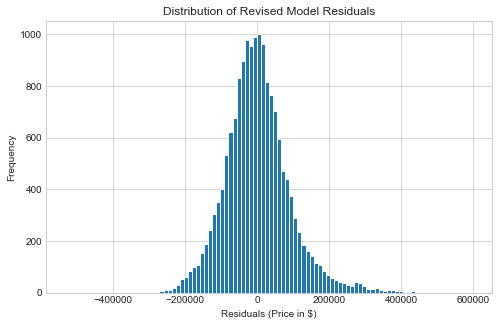

In [51]:
plt.figure(figsize=(8, 5))
plt.hist(model_rev.resid, bins=100)
plt.xlabel('Residuals (Price in $)')
plt.ylabel('Frequency')
plt.title('Distribution of Revised Model Residuals')
plt.show()

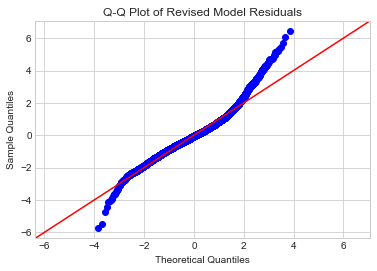

In [52]:
sm.graphics.qqplot(model_rev.resid, line='45', fit=True)
plt.title('Q-Q Plot of Revised Model Residuals')
plt.show()

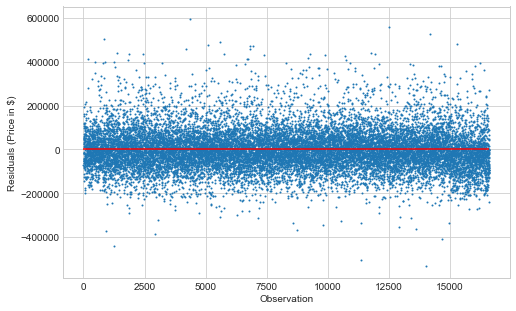

In [53]:
rev_res_x = list(range(0, len(X_rev)))

plt.figure(figsize=(8, 5))
plt.scatter(rev_res_x, model_rev.resid, s=1)
plt.hlines(y=0, xmin=0, xmax=len(X_rev), color='red')
plt.xlabel('Observation')
plt.ylabel('Residuals (Price in $)')
plt.show()

### CONCLUSION: The histogram indicates some right-skew, but this does not seem alarming. The model residuals appear to be homoscedastic, and the Q-Q plot indicates that the distribution is not quite normal.

### REVISED MODEL Train-Test-Split Validation

In [54]:
rev_predictors = df_rev[['zip_coded', 'grade',
                         'sqft_living15_log', 'dist_dt', 'sqft_above_log']]
X_rev_train, X_rev_test, y_rev_train, y_rev_test = train_test_split(
    rev_predictors, y_rev, test_size=0.25)

In [55]:
df_rev_train = pd.concat([X_rev_train, y_rev_train], axis=1)
df_rev_test = pd.concat([X_rev_test, y_rev_test], axis=1)

y_hat_rev_train = model_rev.predict(X_rev_train)
y_hat_rev_test = model_rev.predict(X_rev_test)

In [56]:
train_rev_rmse = np.sqrt(mean_squared_error(y_rev_train, y_hat_rev_train))
test_rev_rmse = np.sqrt(mean_squared_error(y_rev_test, y_hat_rev_test))
print('Train Root Mean Squarred Error - Revised Model ($ Price):', train_rev_rmse)
print('Test Root Mean Squarred Error - Revised Model($ Price):', test_rev_rmse)

Train Root Mean Squarred Error - Revised Model ($ Price): 91858.80224603626
Test Root Mean Squarred Error - Revised Model($ Price): 93502.51310347518


#### The revised model Train and Test RMSE's are nearly identical. This tells us that our revised model is not being undertrained or overtained on the train-test-split - there is a good balance here.

#### The train-test-split tells us that the standard deviation of revised model residuals is $92-93k.

# CONCLUSIONS & RECOMMENDATIONS
## Conclusion
### The most important predictors of sales price in King County are: zip code ('zip_coded'), construction/design grade ('grade'), size of neighborhood interior living space ('sqft_living15_log'), distance from downtown Seattle ('dist_dt'), and size of house above ground level ('sqft_above_log). Grade, size of neighborhood interior living space (log transformed), and size of house above ground (log transformed) have a positive relationship with price. Distance from downtown Seattle has a negative relationship with price. Zip code is more complex in interpretation - however, the zip code in which a home is located is generally a good predictor of price. These five features together can explain 77% of the variability in King County housing prices.

## Recommendations
### While zip code and distance from downtown Seattle are factors that are largely outside of homeowners' control, they could ensure that desireable locations are emphasized during the selling process. Homeowners looking to maximize sales profit can also make additions to their homes to increase size, as well as use high quality construction and design in their initial home build or renovations.

## Future Work
### Given more time, I would explore a method to more judiciously remove outliers in the data set. Using the IQR score method for each variable resulted in loss of ~23% of original data. 
### I would explore whether zip codes could be binned into "regions" of several zip codes, to see if these would produce more signifcant or interpretable modeling results.

# Code for Figures for Presentation

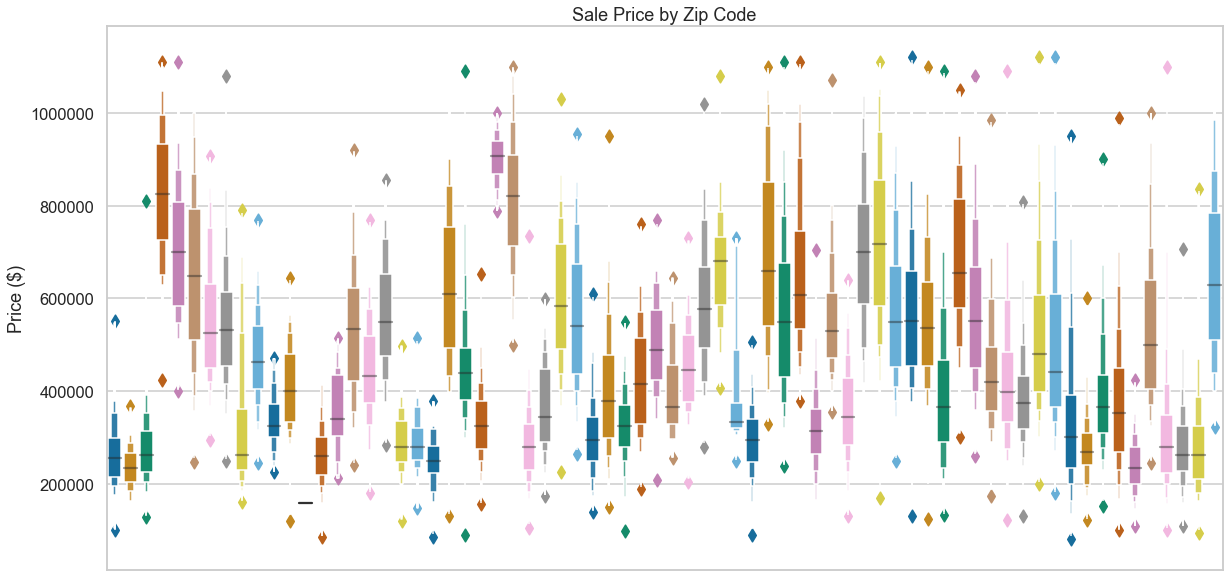

In [57]:
# Figure #1: Zip Code vs Price - Seaborn boxenplot

fig_1 = plt.figure(figsize=(20, 10))
sns.set_context('talk')
sns.set_style('whitegrid')
sns.boxenplot(x=X_rev.zip_coded, y=y_rev, palette='colorblind')
plt.title('Sale Price by Zip Code')
plt.ylabel('Price ($)')
plt.xlabel('')
plt.xticks(ticks=[])
fig_1.show()

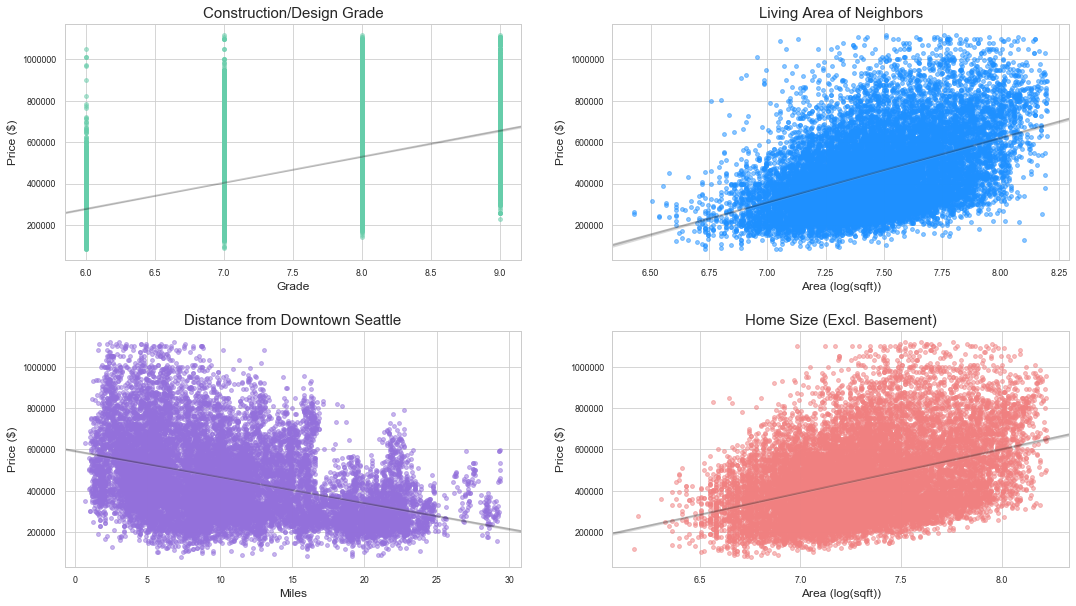

In [58]:
# Figure #2: Final Model Selected Features Plots vs. Price
# Grade, sqft_living_15_log, sqft_above_log, dist_dt - Seaborn Regplots

fig_2 = plt.figure(figsize=(18, 10))
sns.set_context('paper')
sns.set_style('whitegrid')
ax1 = plt.subplot(221)
ax1 = sns.regplot(x=X_rev.grade, y=y_rev, line_kws={
                  "color": "black", 'alpha': 0.2}, color='mediumaquamarine', scatter_kws={'alpha': 0.5, 's': 15})
plt.title('Construction/Design Grade', fontsize=15)
plt.ylabel('Price ($)', fontsize=12)
plt.xlabel('Grade', fontsize=12)
ax2 = plt.subplot(222)
ax2 = sns.regplot(x=X_rev.sqft_living15_log, y=y_rev, line_kws={
                  "color": "black", 'alpha': 0.2}, color='dodgerblue', scatter_kws={'alpha': 0.5, 's': 15})
plt.title('Living Area of Neighbors', fontsize=15)
plt.ylabel('Price ($)', fontsize=12)
plt.xlabel('Area (log(sqft))', fontsize=12)
ax3 = plt.subplot(223)
ax3 = sns.regplot(x=X_rev.dist_dt*0.000621371, y=y_rev, line_kws={
                  "color": "black", 'alpha': 0.2}, color='mediumpurple', scatter_kws={'alpha': 0.5, 's': 15})
plt.title('Distance from Downtown Seattle', fontsize=15)
plt.ylabel('Price ($)', fontsize=12)
plt.xlabel('Miles', fontsize=12)
ax4 = plt.subplot(224)
ax4 = sns.regplot(x=X_rev.sqft_above_log, y=y_rev, line_kws={
                  "color": "black", 'alpha': 0.2}, color='lightcoral', scatter_kws={'alpha': 0.5, 's': 15})
plt.title('Home Size (Excl. Basement)', fontsize=15)
plt.ylabel('Price ($)', fontsize=12)
plt.xlabel('Area (log(sqft))', fontsize=12)

plt.subplots_adjust(hspace=0.3)
fig_2.show()